In [56]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot,show
import matplotlib.pyplot as plt

In [57]:
file = open("/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/MNWN_RNEMD_1.rnemd")

In [58]:
lines =  file.readlines()
z = []
T = []
for line in lines:
    if line[0] != '#':
        words = line.split()
        z.append(float(words[0]))
        T.append(float(words[1]))
    

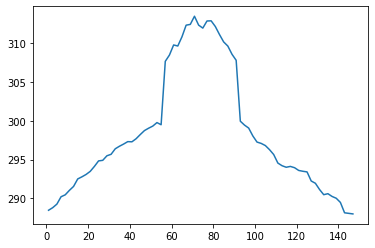

In [10]:
plot(z,T)
show()


In [11]:
def thermalConductance(fileName, z1w, z1m, z2m, z2w, flux_omd ):
    rnemdFile = open(fileName)
    lines = rnemdFile.readlines()
    z = []
    T = []
    for line in lines:
        if line[0] != '#':
            word = line.split()
            z.append(float(word[0]))
            T.append(float(word[1]))
    
    zArray = np.array(z)
    TArray = np.array(T)
    
    t1m = TArray[zArray == z1m]
    t2m = TArray[zArray == z2m]
    t1w = TArray[zArray == z1w]
    t2w = TArray[zArray == z2w]
    
    g_omd1 = flux_omd/(t1m-t1w)
    g_omd2 = flux_omd/(t2m-t2w)
    
    G_conversion_factor = 6.95e8
    
    G1 = g_omd1 * G_conversion_factor
    G2 = g_omd2 * G_conversion_factor
    
    return G1, G2
    
    
    
    
    

In [12]:
thermalConductance("/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/MNWN_RNEMD_1.rnemd",53,59,89,95,2.4999975e-06)

(array([199.82521889]), array([190.61402048]))

In [13]:
def average_error_thermalConductance(path,fileList,z1w, z1m, z2m, z2w, flux_omd):
    G = []
    for rnemd in fileList:
        rnemdFile = path + rnemd
        g = thermalConductance(rnemdFile,z1w, z1m, z2m, z2w, flux_omd)
        G.append(g[0])
        G.append(g[1])
    print(G)
    average_G = np.mean(G)
    error_G = 1.96 * np.std(G)/np.sqrt(len(G))
    return average_G, error_G, np.std(G)

In [14]:
rnemdList = []
for counter in range(1,6):
    rnemdList.append("MNWN_RNEMD_%d.rnemd"%(counter))

In [15]:
rnemdList

['MNWN_RNEMD_1.rnemd',
 'MNWN_RNEMD_2.rnemd',
 'MNWN_RNEMD_3.rnemd',
 'MNWN_RNEMD_4.rnemd',
 'MNWN_RNEMD_5.rnemd']

In [16]:
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999975e-06

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

[array([199.82521889]), array([190.61402048]), array([282.522799]), array([348.3209934]), array([307.92839085]), array([240.65306208]), array([232.17598389]), array([255.31057736]), array([246.00839651]), array([249.533356])]


(255.289279846691, 27.92178106801756, 45.04919617525731)

# Interfacial Thermal Conductivity

### Interfacial thermal conductivity of the water-gold interface, where gold is non fluctuating and water is SPC/E
##### System : MNWN
##### Result : 255.29 $\pm$ 27.92 $MWm^{-2}K^{-1}$

In [17]:


rnemdList = []
for counter in range(1,6):
    rnemdList.append("MNWN_RNEMD_%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999975e-06

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

[array([199.82521889]), array([190.61402048]), array([282.522799]), array([348.3209934]), array([307.92839085]), array([240.65306208]), array([232.17598389]), array([255.31057736]), array([246.00839651]), array([249.533356])]


(255.289279846691, 27.92178106801756, 45.04919617525731)

### Interfacial thermal conductivity of the water-gold interface, where gold is fluctuating and water is SPC/E
##### System : MFWN
##### Result : 264.93$\pm$ 16.24 $MWm^{-2}K^{-1}$

In [18]:


rnemdList = []
for counter in range(1,6):
    rnemdList.append("MFWN_RNEMD_%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999997e-06

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

[array([284.73660697]), array([228.55073057]), array([265.68087579]), array([302.53376042]), array([287.15824719]), array([212.66124516]), array([276.90916605]), array([267.02010012]), array([275.27932601]), array([248.7715041])]


(264.93015623829154, 16.248567530203694, 26.215552097194106)

### Interfacial thermal conductivity of the water-gold interface, where gold is non-fluctuating and water is TIP4P
##### System : MNWF
##### Result : 263.76$\pm$ 24.63 $MWm^{-2}K^{-1}$
#### Target Temp: 306K (nuclear), 279 (electronic)

In [19]:


rnemdList = []
for counter in range(1,6):
    rnemdList.append("MNWF_RNEMD_TC_%d.rnemd"%(counter))
path = "/afs/crc.nd.edu/user/h/hbhattar/Hemanta/metals/ThermalConductivity/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999973e-06

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

[array([226.50187179]), array([267.33002385]), array([270.37007261]), array([252.73582256]), array([341.70431944]), array([235.31314268]), array([321.41844629]), array([204.12768638]), array([244.5823196]), array([273.60839447])]


(263.7692099669108, 24.633669617582434, 39.74413424471912)

### Interfacial thermal conductivity of the water-gold interface, where gold is fluctuating and water is TIP4P
##### System : MFWF
##### Result : 406.41$\pm$ 170.09 $MWm^{-2}K^{-1}$
#### Target Temp: 

In [14]:

rnemdList = []
for counter in range(1,6):
    rnemdList.append("MFWF_RNEMD_TC_%d.rnemd"%(counter))
path = "/afs/crc.nd.edu/user/h/hbhattar/Hemanta/metals/ThermalConductivity/"
z1w, z1m, z2m, z2w = 53,59,89,95
flux_omd = 2.4999973e-06

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

[array([449.03670178]), array([268.92967013]), array([476.21998057]), array([1188.13039258]), array([388.07955103]), array([287.97134098]), array([210.51142197]), array([217.80938349]), array([276.33593635]), array([301.14863387])]


(406.41730127502626, 170.07870673943458, 274.40617081247103)

In [16]:
from scipy import stats
def thermalConductivity(fileName, zBoundary, flux_omd, area,plotShow = False ):
    rnemdFile = open(fileName)
    lines = rnemdFile.readlines()
    z = []
    T = []
    z1, z2 = zBoundary
    for line in lines:
        if line[0] != '#':
            word = line.split()
            z.append(float(word[0]))
            T.append(float(word[1]))
    
    zArray = np.array(z)
    TArray = np.array(T)
    
    
    
    t_sel = TArray[np.logical_and(zArray > z1, zArray < z2)]
    z_sel = zArray[np.logical_and(zArray > z1, zArray < z2)]
    print(len(z_sel))
    if plotShow:
        plot(z_sel,t_sel,'o')
        show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(z_sel,t_sel)
    
    x = np.linspace(min(zArray), max(zArray), 1000)
    y = slope *x + intercept
    plot(zArray,TArray,'o')
    plot(x,y)
    show()
    
    
    lambda_omd = flux_omd / abs(slope)
    lambda_convesion = 0.06947 * 1e6
    lambda_standard = lambda_omd * lambda_convesion
    
    
    
    return lambda_standard,abs(slope), r_value

19


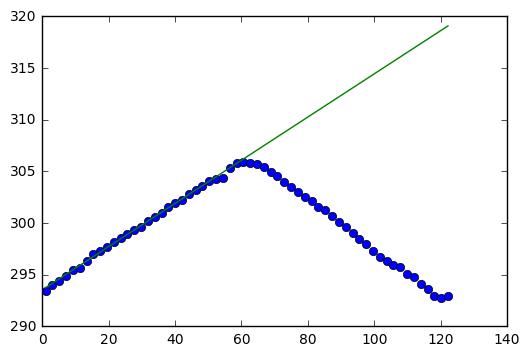

(0.9969505554059048, 0.20904747870384266, 0.9989949022582748)

In [295]:
water1 = [6.16027, 46.202008 ]
water2 = [77.003346, 123.2053535 - 6.16027]
metal1 = [48.25543, 55.4424]
metal2 = [67.7629, 74.949923 ]
area = 39.975673 * 23.079965

thermalConductivity("/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/RNEMD_51_NVT.rnemd",water1, 3e-6, area )

19


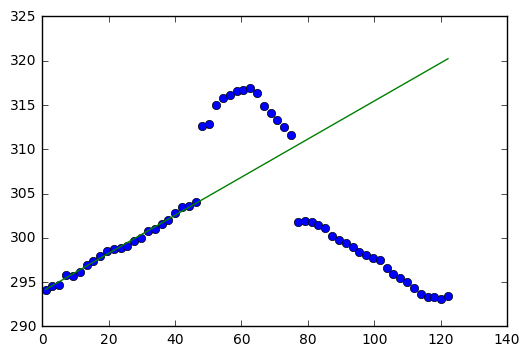

(0.9691429275566981, 0.21504568013040298, 0.994864383225501)

In [296]:
thermalConductivity("/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/RNEMD_11.rnemd",water1, 3e-6, area )

In [297]:
def average_error_thermalConductivity(path, fileList, zBoundary1, zBoundary2, area, flux_omd, plotShow = False):
    Lambda = []
    for rnemd in fileList:
        rnemdFile = path + rnemd
        Lambda_standard1, slope1, r_value1 = thermalConductivity(rnemdFile, zBoundary1, flux_omd, area, plotShow)
        Lambda_standard2, slope2, r_value2 = thermalConductivity(rnemdFile, zBoundary2, flux_omd, area, plotShow)
        Lambda.append(Lambda_standard1)
        Lambda.append(Lambda_standard2)
        
    
    average_Lambda = np.mean(Lambda)
    error_Lambda = 1.96 * np.std(Lambda)/np.sqrt(len(Lambda))
    return average_Lambda, error_Lambda

In [265]:
Lambda_standard1 = 1

19


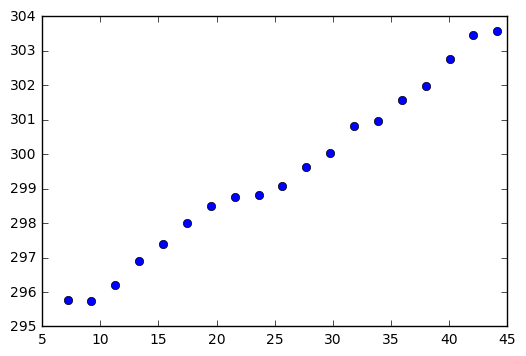

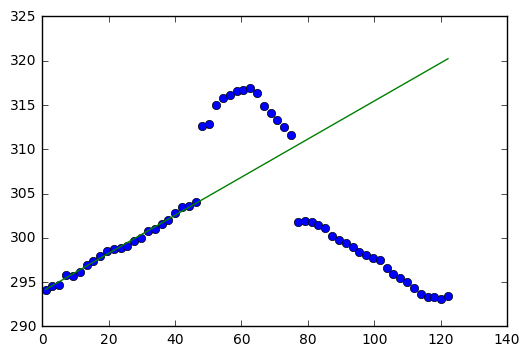

19


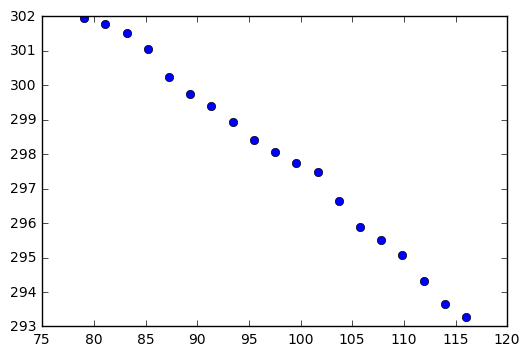

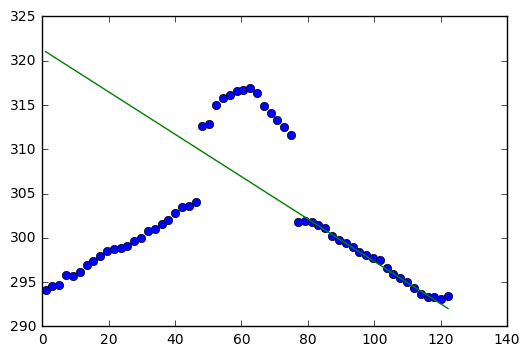

19


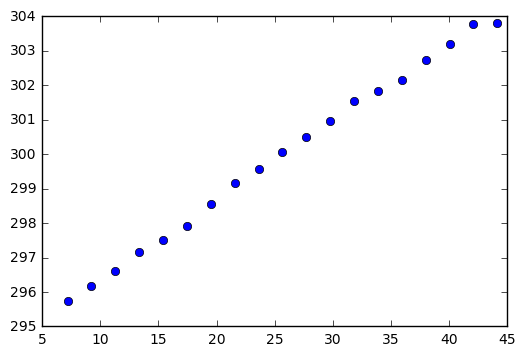

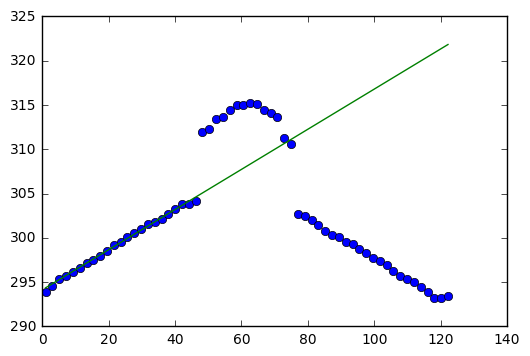

19


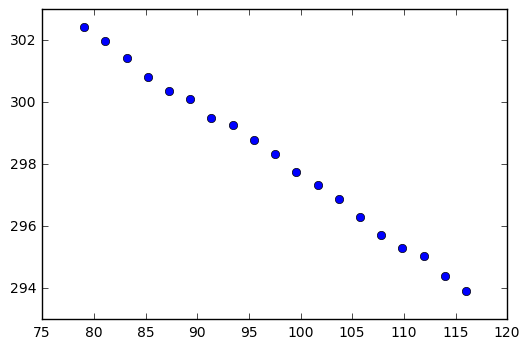

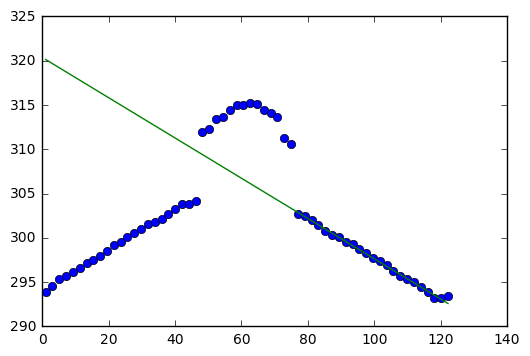

19


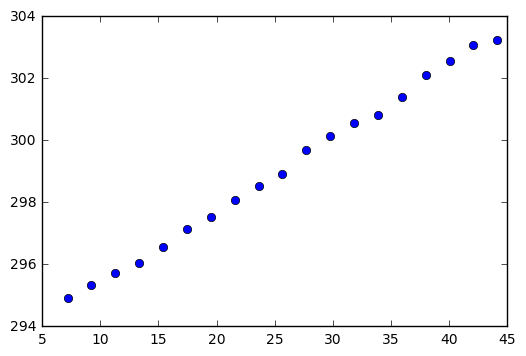

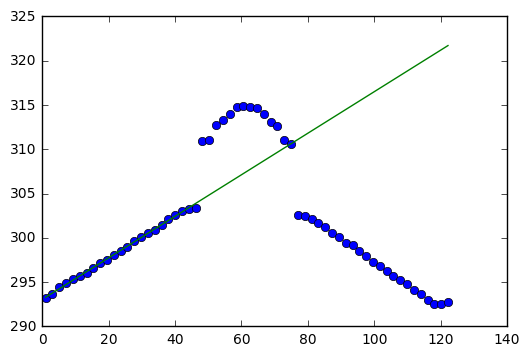

19


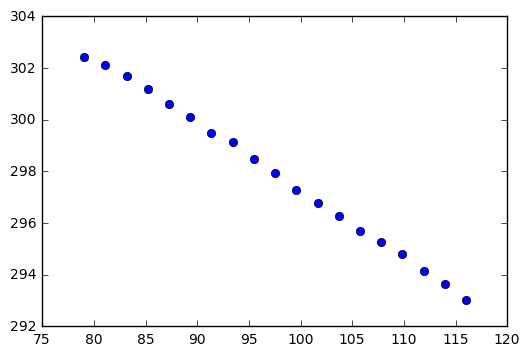

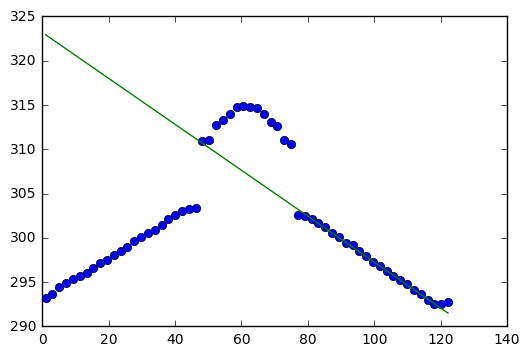

19


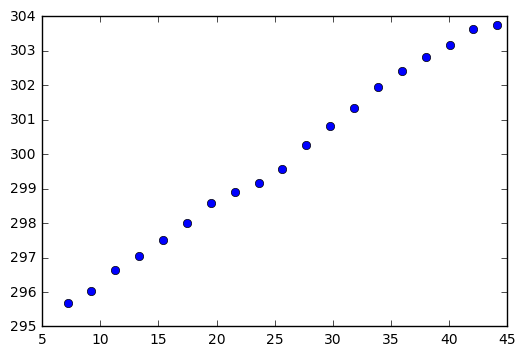

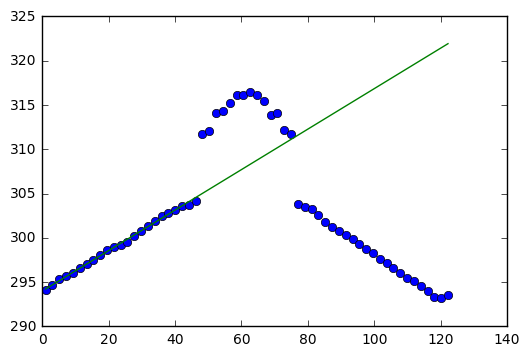

19


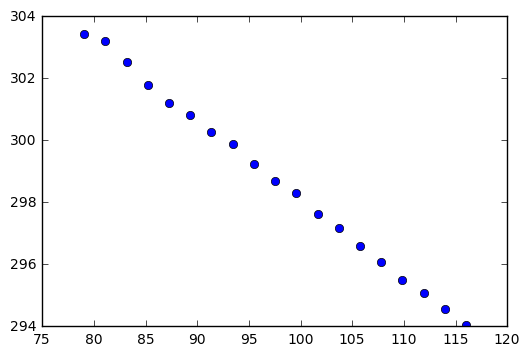

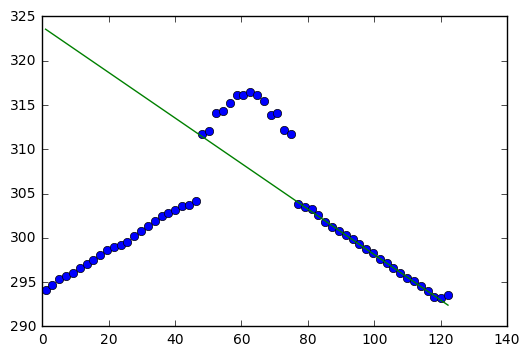

19


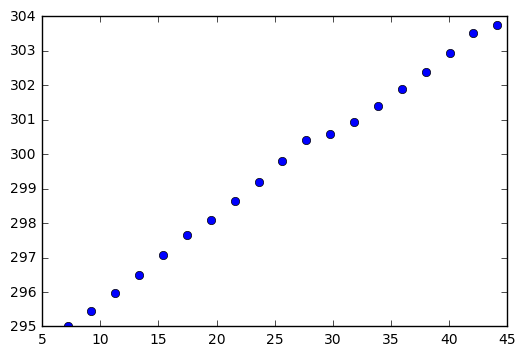

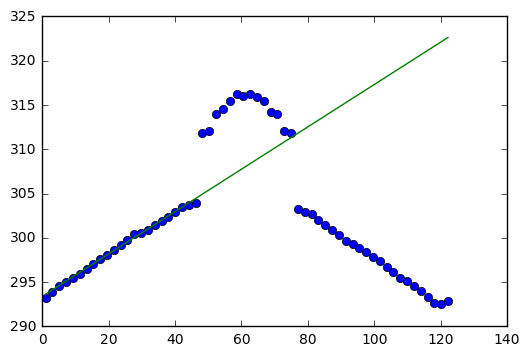

19


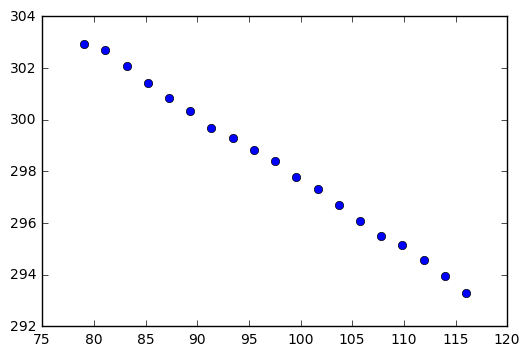

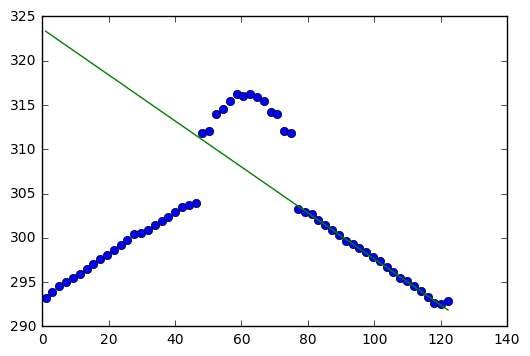

(0.8762439433583348, 0.03319085563212818)

In [298]:
# RNEMD 1
## non fq water non fq gold
water1 = [6.16027, 46.202008 ]
water2 = [77.003346, 123.2053535 - 6.16027]
metal1 = [48.25543, 55.4424]
metal2 = [67.7629, 74.949923 ]
area = 39.975673 * 23.079965

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_1%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
flux_omd = 3e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd, True)

19


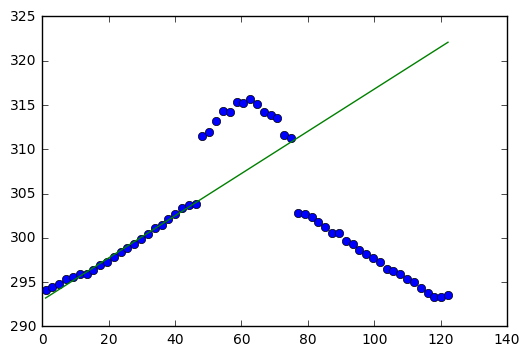

19


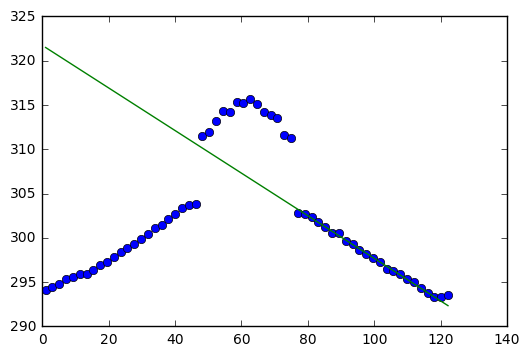

19


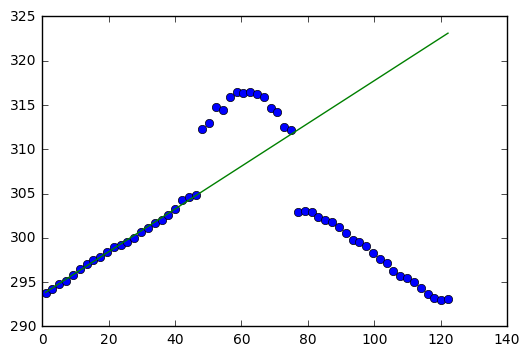

19


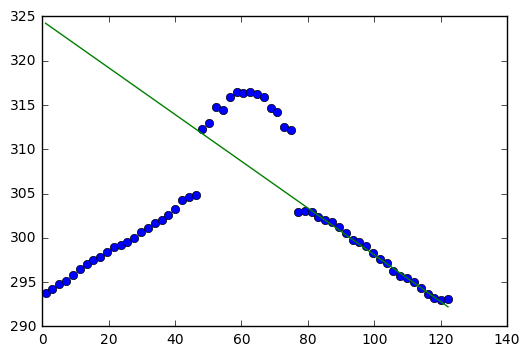

19


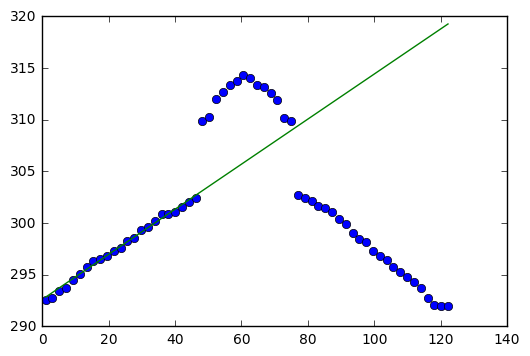

19


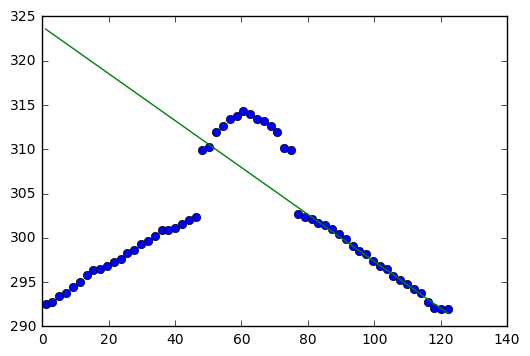

19


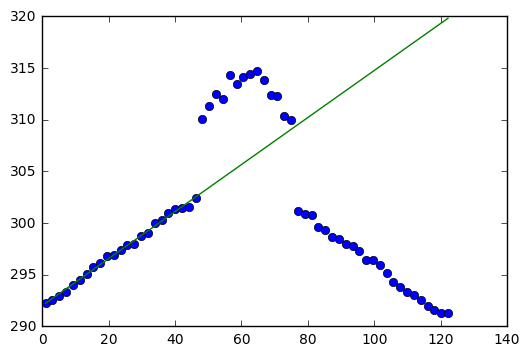

19


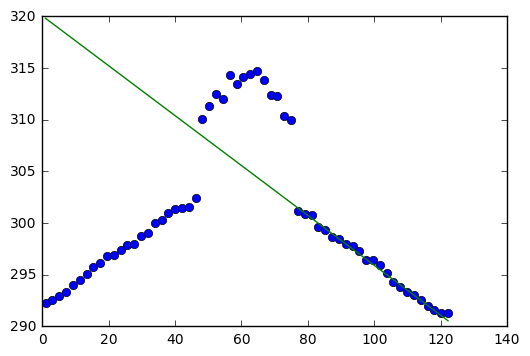

19


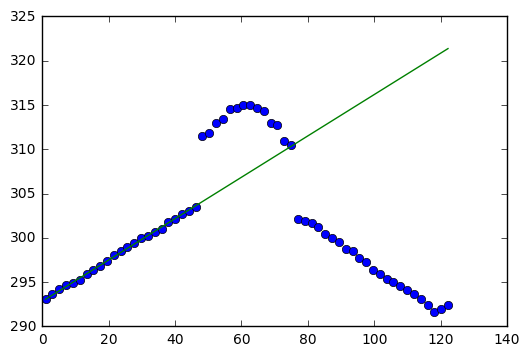

19


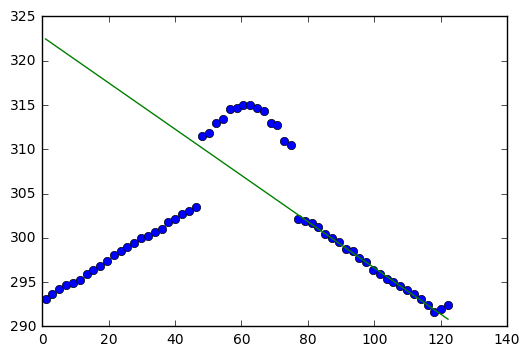

(0.8601805992870449, 0.03264914795678347)

In [299]:
# RNEMD 1
## non fq water fq gold
water1 = [6.16027, 46.202008 ]
water2 = [77.003346, 123.2053535 - 6.16027]
metal1 = [48.25543, 55.4424]
metal2 = [67.7629, 74.949923 ]
area = 39.975673 * 23.079965

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_2%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
flux_omd = 3e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

24


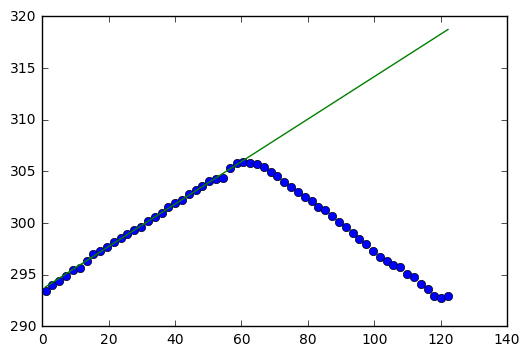

24


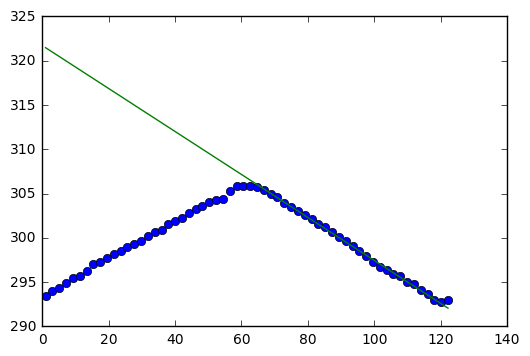

24


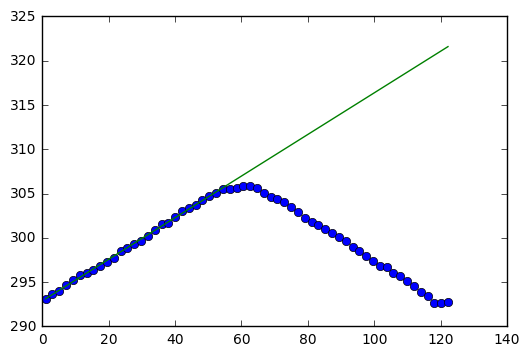

24


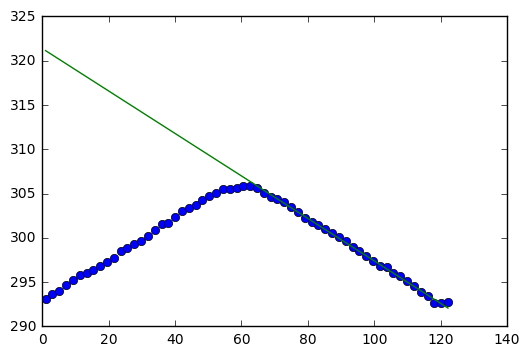

24


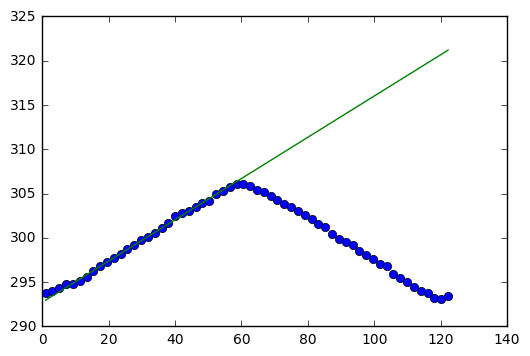

24


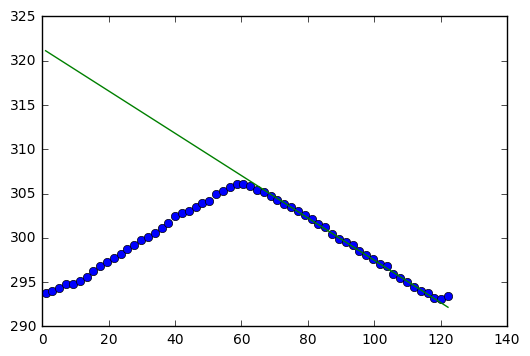

24


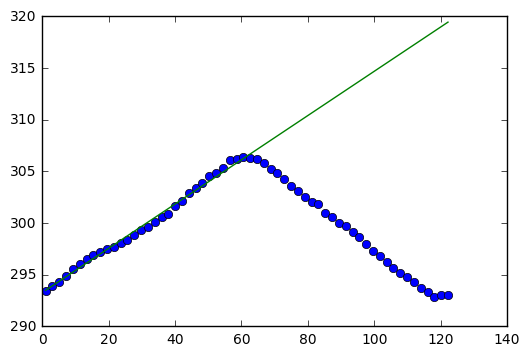

24


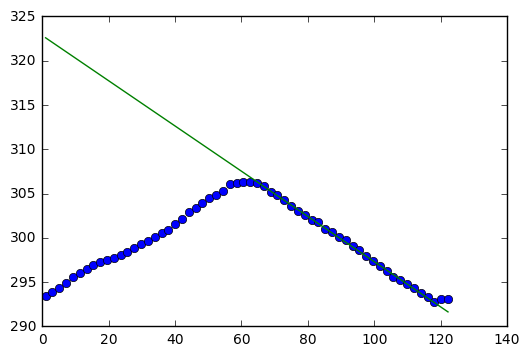

24


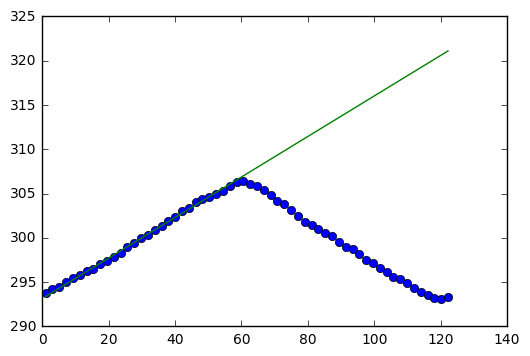

24


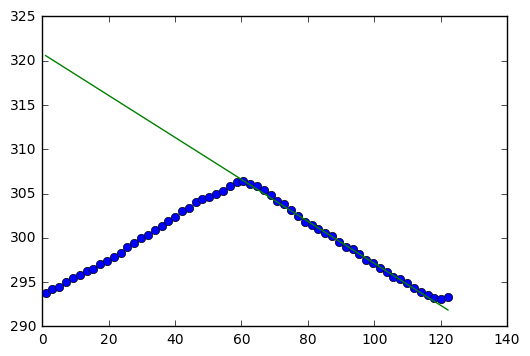

(0.8972344203908549, 0.03365068242467089)

In [300]:
# RNEMD 1
## fq water 
water1 = [6.16027, 55.4424 ]
water2 = [67.7629, 123.2053535 - 6.16027]
area = 39.975673 * 23.079965

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_5%d_NVT.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
flux_omd = 3e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

### For metals

3


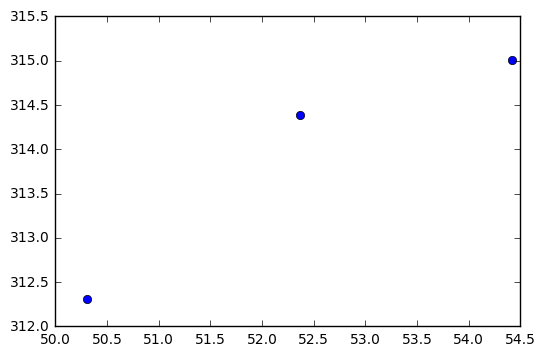

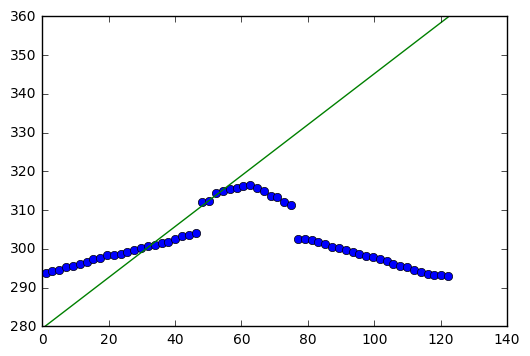

3


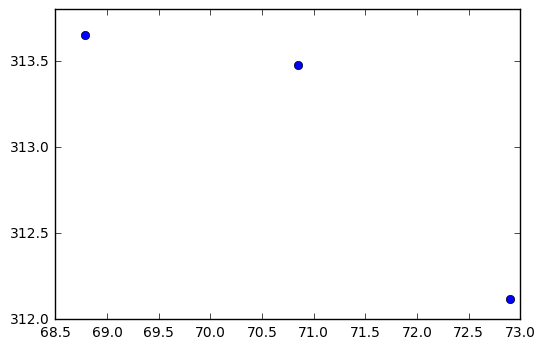

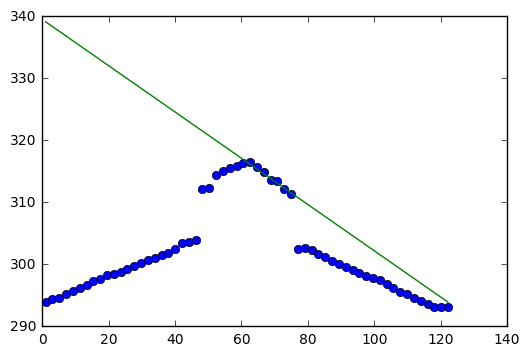

3


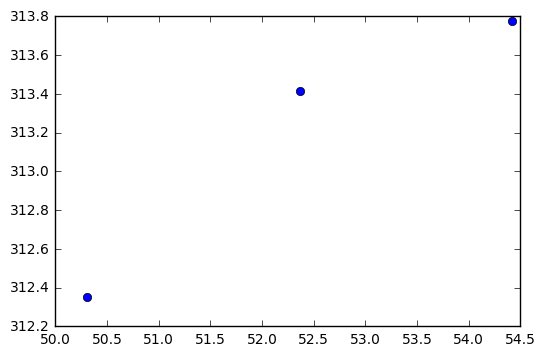

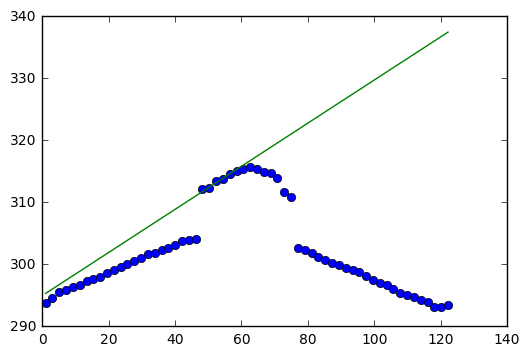

3


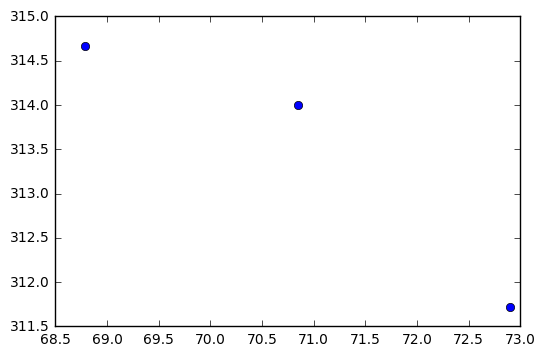

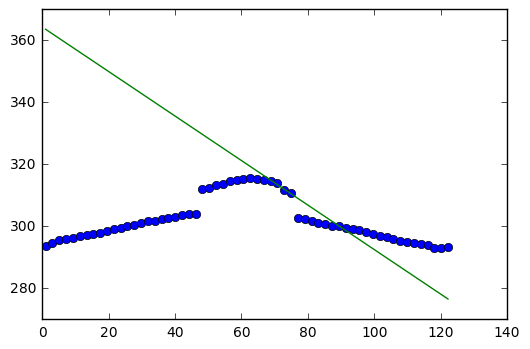

3


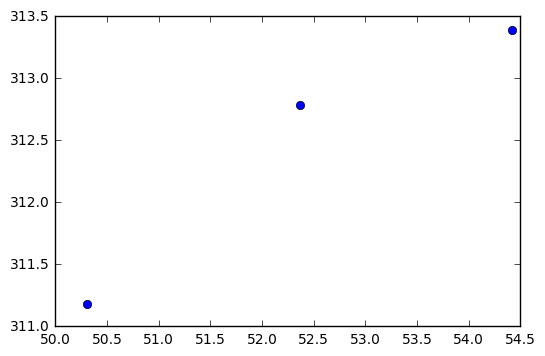

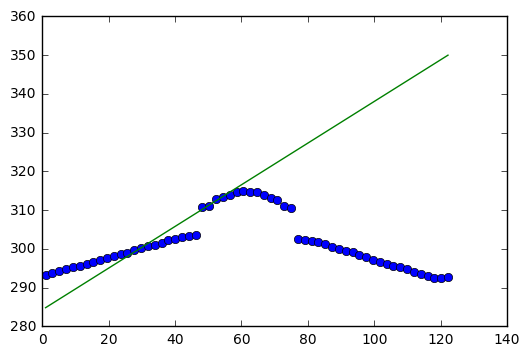

3


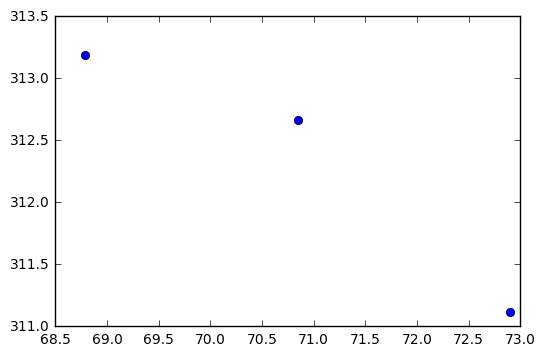

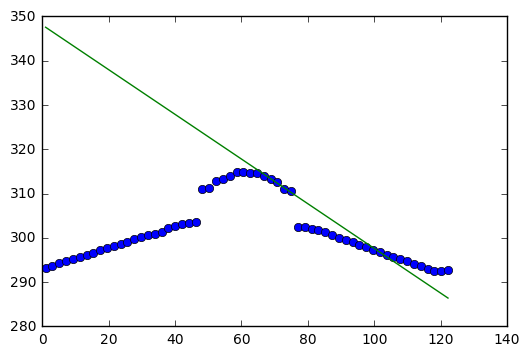

3


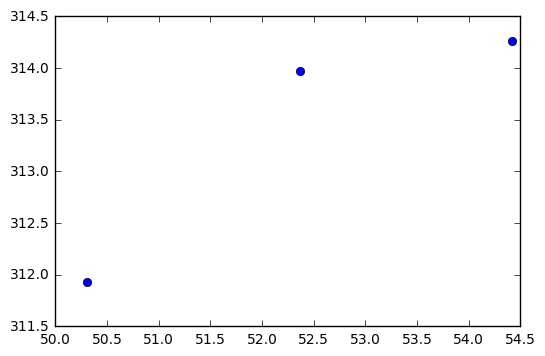

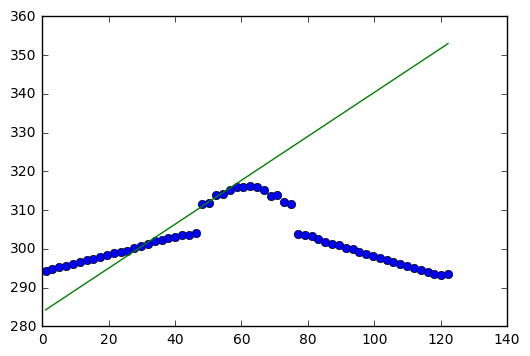

3


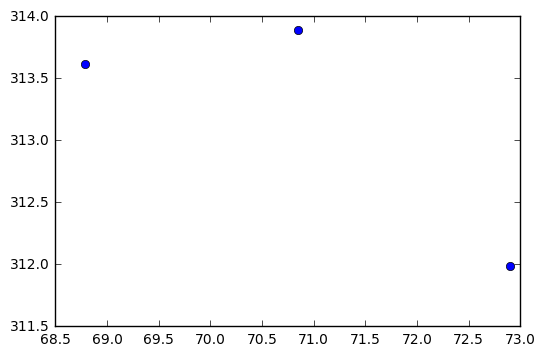

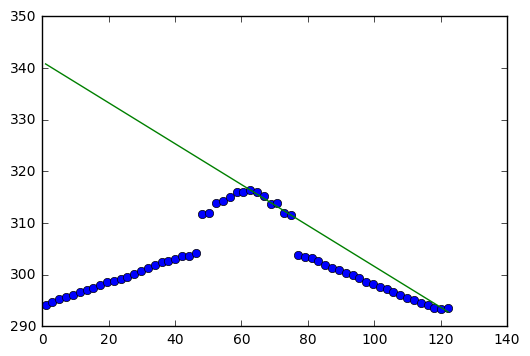

3


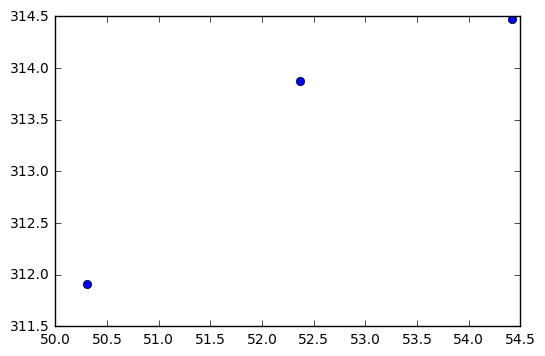

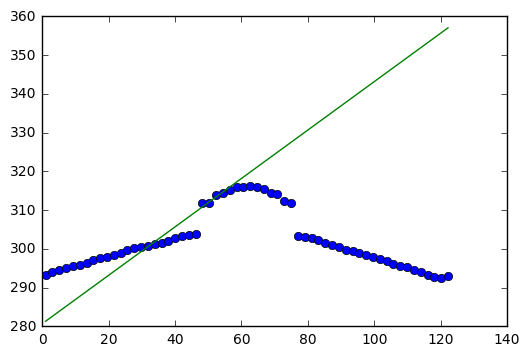

3


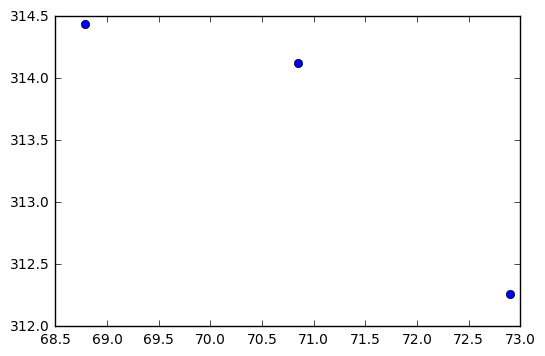

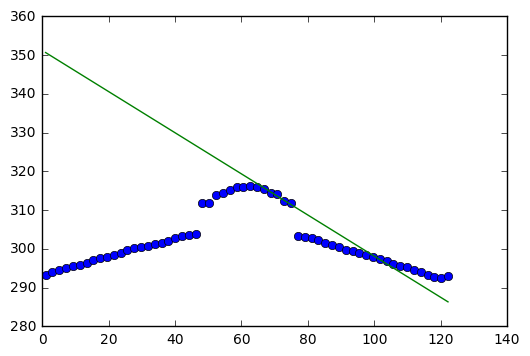

(0.418460216540118, 0.06262630510916105)

In [269]:
# RNEMD 1
## non fq water non fq gold
water1 = [6.16027, 46.202008 ]
water2 = [77.003346, 123.2053535 - 6.16027]
metal1 = [48.25543, 55.4424]
metal2 = [67.7629, 74.949923 ]
area = 39.975673 * 23.079965

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_1%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
flux_omd = 3e-6

average_error_thermalConductivity(path, rnemdList, metal1, metal2, area, flux_omd, True)

3


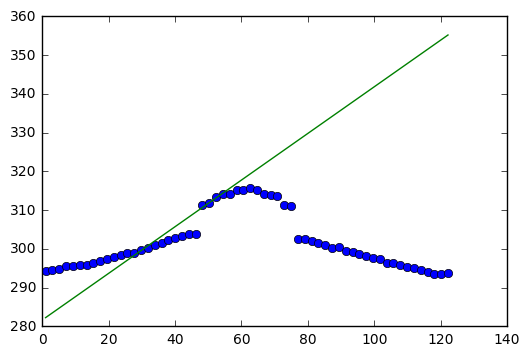

3


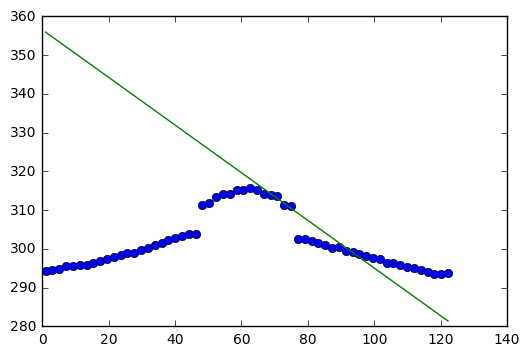

3


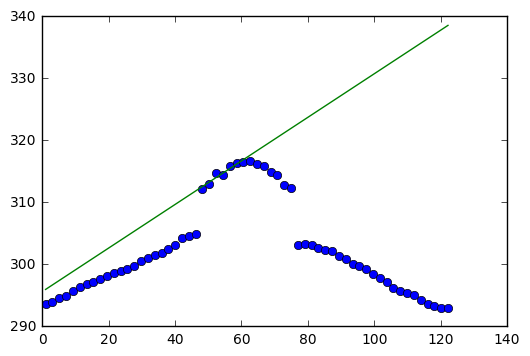

3


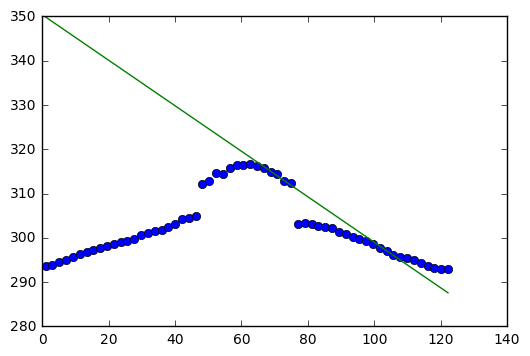

3


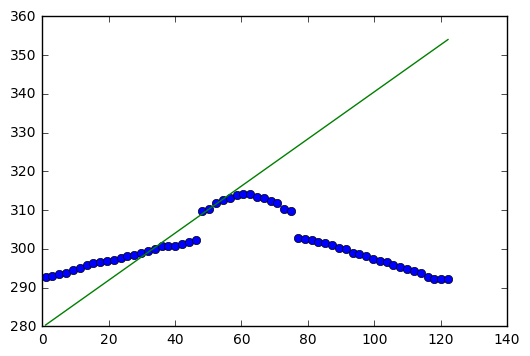

3


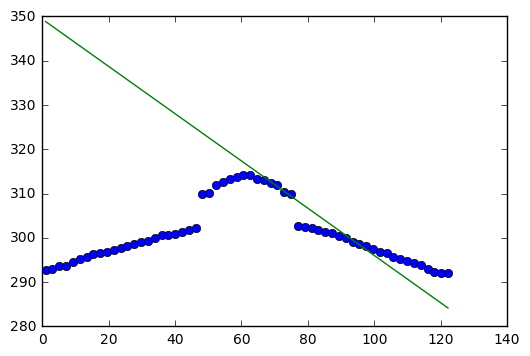

3


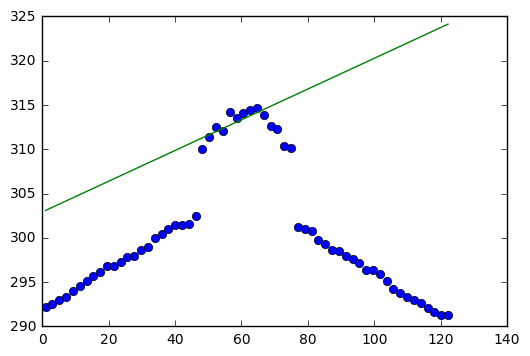

3


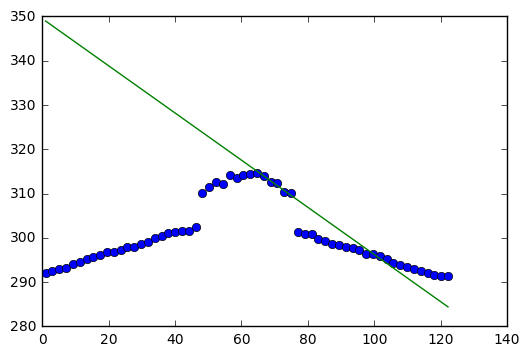

3


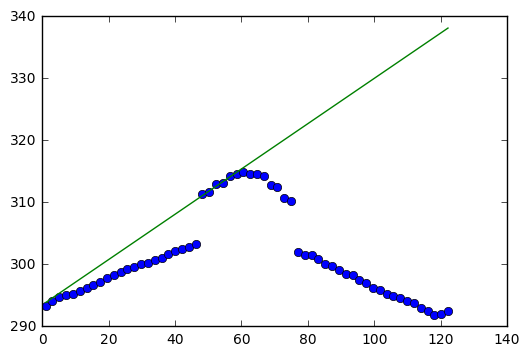

3


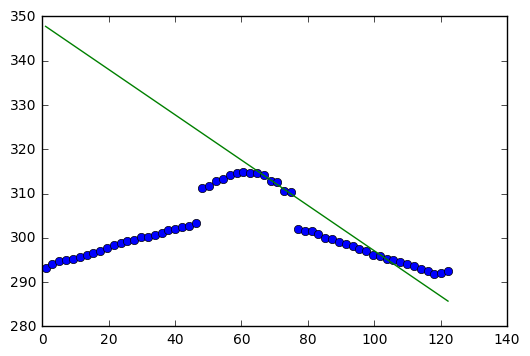

(0.4985373871791882, 0.15439056571197896)

In [270]:
# RNEMD 1
## non fq water - fq gold
water1 = [6.16027, 46.202008 ]
water2 = [77.003346, 123.2053535 - 6.16027]
metal1 = [48.25543, 55.4424]
metal2 = [67.7629, 74.949923 ]
area = 39.975673 * 23.079965

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_2%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
flux_omd = 3e-6

average_error_thermalConductivity(path, rnemdList, metal1, metal2, area, flux_omd)

In [30]:
def getColumnsOfRhoZ(fileName ):
    rnemdFile = open(fileName)
    lines = rnemdFile.readlines()
    z = []
    rho = []
    for line in lines:
        if line[0] != '#':
            word = line.split()
            z.append(float(word[0]))
            rho.append(float(word[1]))
    
    zArray = np.array(z)
    rhoArray = np.array(rho)
    return zArray, rhoArray

In [46]:
pathGroup = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/"
rnemd = "MNWN_RNEMD_1.RhoZ"
z,d=getColumnsOfRhoZ(pathGroup+ rnemd)
z

array([  0.74,   2.22,   3.7 ,   5.18,   6.66,   8.14,   9.62,  11.1 ,
        12.58,  14.06,  15.54,  17.02,  18.5 ,  19.98,  21.46,  22.94,
        24.42,  25.9 ,  27.38,  28.86,  30.34,  31.82,  33.3 ,  34.78,
        36.26,  37.74,  39.22,  40.7 ,  42.18,  43.66,  45.14,  46.62,
        48.1 ,  49.58,  51.06,  52.54,  54.02,  55.5 ,  56.98,  58.46,
        59.94,  61.42,  62.9 ,  64.38,  65.86,  67.34,  68.82,  70.3 ,
        71.78,  73.26,  74.74,  76.22,  77.7 ,  79.18,  80.66,  82.14,
        83.62,  85.1 ,  86.58,  88.06,  89.54,  91.02,  92.5 ,  93.98,
        95.46,  96.94,  98.42,  99.9 , 101.38, 102.86, 104.34, 105.82,
       107.3 , 108.78, 110.26, 111.74, 113.22, 114.7 , 116.18, 117.66,
       119.14, 120.62, 122.1 , 123.58, 125.06, 126.54, 128.02, 129.5 ,
       130.98, 132.46, 133.94, 135.42, 136.9 , 138.38, 139.86, 141.34,
       142.82, 144.3 , 145.78, 147.26])

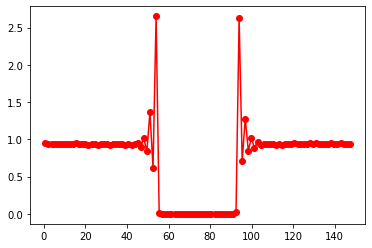

In [99]:
system = "MNWN"
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/"
z_final = np.zeros(100) 
d_final = np.zeros(100)
for counter in range(1,6):
    fileName = path + "%s_RNEMD_%d.RhoZ"%(system, counter)
    z,d=getColumnsOfRhoZ(fileName)
    z_final = z + z_final
    d_final = d + d_final
    
z_MNWN = z_final/5
d_MNWN = d_final/5

plt.plot(z_MNWN,d_MNWN,'or-')
plt.show()


In [100]:
system = "MFWN"
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD_Water_Gold/newbox/"
z_final = np.zeros(100) 
d_final = np.zeros(100)
for counter in range(1,6):
    fileName = path + "%s_RNEMD_%d.RhoZ"%(system, counter)
    z,d=getColumnsOfRhoZ(fileName)
    z_final = z + z_final
    d_final = d + d_final
    
z_MFWN = z_final/5
d_MFWN = d_final/5

(85, 110)

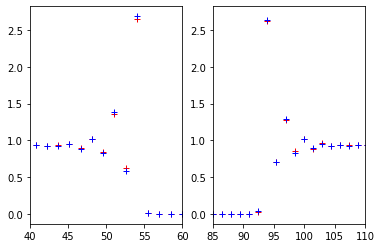

In [101]:
plt.subplot(1,2,1)
plt.plot(z_MNWN,d_MNWN,'+r')
plt.plot(z_MFWN,d_MFWN,'+b')
plt.xlim([40,60])
plt.subplot(1,2,2)
plt.plot(z_MNWN,d_MNWN,'+r')
plt.plot(z_MFWN,d_MFWN,'+b')
plt.xlim([85,110])

In [97]:
system = "MNWF"
path = "/afs/crc.nd.edu/user/h/hbhattar/Hemanta/metals/ThermalConductivity/"
z_final = np.zeros(100) 
d_final = np.zeros(100)
for counter in range(1,6):
    fileName = path + "%s_RNEMD_TC_%d.RhoZ"%(system, counter)
    z,d=getColumnsOfRhoZ(fileName)
    z_final = z + z_final
    d_final = d + d_final
    
z_MNWF = z_final/5
d_MNWF = d_final/5

(85, 110)

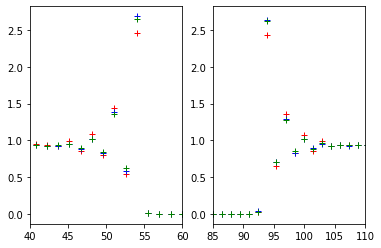

In [104]:
plt.subplot(1,2,1)
plt.plot(z_MNWF,d_MNWF,'+r')
plt.plot(z_MFWN,d_MFWN,'+b')
plt.plot(z_MNWN,d_MNWN,'+g')


plt.xlim([40,60])
plt.subplot(1,2,2)
plt.plot(z_MNWF,d_MNWF,'+r')
plt.plot(z_MFWN,d_MFWN,'+b')
plt.plot(z_MNWN,d_MNWN,'+g')

plt.xlim([85,110])

In [562]:
f = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN_Equlibrated.dump")
new = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.dump",'w')

lines = f.readlines()

for line in lines:
    if "Time:" in line:
        print(line)
        line1 = line.split()
        print(line1)
        line1[1] = str(int(float(line1[1])))
        line1.append("\n")
        line = " ".join(line1)
        print(line)
    new.write(line)
new.close()
f.close()

        Time: 0

['Time:', '0']
Time: 0 

        Time: 100.1

['Time:', '100.1']
Time: 100 

        Time: 200.1

['Time:', '200.1']
Time: 200 

        Time: 300.1

['Time:', '300.1']
Time: 300 

        Time: 400

['Time:', '400']
Time: 400 

        Time: 500

['Time:', '500']
Time: 500 

        Time: 600

['Time:', '600']
Time: 600 

        Time: 700

['Time:', '700']
Time: 700 

        Time: 800

['Time:', '800']
Time: 800 

        Time: 900

['Time:', '900']
Time: 900 

        Time: 1000

['Time:', '1000']
Time: 1000 

        Time: 1100

['Time:', '1100']
Time: 1100 

        Time: 1200

['Time:', '1200']
Time: 1200 

        Time: 1300.1

['Time:', '1300.1']
Time: 1300 

        Time: 1400.1

['Time:', '1400.1']
Time: 1400 

        Time: 1500.1

['Time:', '1500.1']
Time: 1500 

        Time: 1600.1

['Time:', '1600.1']
Time: 1600 

        Time: 1700.1

['Time:', '1700.1']
Time: 1700 

        Time: 1800.1

['Time:', '1800.1']
Time: 1800 

        Time: 1900.1

['Time:',

        Time: 16300

['Time:', '16300']
Time: 16300 

        Time: 16400

['Time:', '16400']
Time: 16400 

        Time: 16500

['Time:', '16500']
Time: 16500 

        Time: 16600

['Time:', '16600']
Time: 16600 

        Time: 16700

['Time:', '16700']
Time: 16700 

        Time: 16800

['Time:', '16800']
Time: 16800 

        Time: 16900

['Time:', '16900']
Time: 16900 

        Time: 17000

['Time:', '17000']
Time: 17000 

        Time: 17100

['Time:', '17100']
Time: 17100 

        Time: 17200

['Time:', '17200']
Time: 17200 

        Time: 17300

['Time:', '17300']
Time: 17300 

        Time: 17400

['Time:', '17400']
Time: 17400 

        Time: 17500

['Time:', '17500']
Time: 17500 

        Time: 17600

['Time:', '17600']
Time: 17600 

        Time: 17700

['Time:', '17700']
Time: 17700 

        Time: 17800

['Time:', '17800']
Time: 17800 

        Time: 17900

['Time:', '17900']
Time: 17900 

        Time: 18000

['Time:', '18000']
Time: 18000 

        Time: 18100

['Time:

        Time: 31400.1

['Time:', '31400.1']
Time: 31400 

        Time: 31500.1

['Time:', '31500.1']
Time: 31500 

        Time: 31600.1

['Time:', '31600.1']
Time: 31600 

        Time: 31700.1

['Time:', '31700.1']
Time: 31700 

        Time: 31800.1

['Time:', '31800.1']
Time: 31800 

        Time: 31900.1

['Time:', '31900.1']
Time: 31900 

        Time: 32000.1

['Time:', '32000.1']
Time: 32000 

        Time: 32100.1

['Time:', '32100.1']
Time: 32100 

        Time: 32200.1

['Time:', '32200.1']
Time: 32200 

        Time: 32300.1

['Time:', '32300.1']
Time: 32300 

        Time: 32400.1

['Time:', '32400.1']
Time: 32400 

        Time: 32500.1

['Time:', '32500.1']
Time: 32500 

        Time: 32600.1

['Time:', '32600.1']
Time: 32600 

        Time: 32700.1

['Time:', '32700.1']
Time: 32700 

        Time: 32800.1

['Time:', '32800.1']
Time: 32800 

        Time: 32900.1

['Time:', '32900.1']
Time: 32900 

        Time: 33000.1

['Time:', '33000.1']
Time: 33000 

        Time: 

        Time: 46500.1

['Time:', '46500.1']
Time: 46500 

        Time: 46600.1

['Time:', '46600.1']
Time: 46600 

        Time: 46700.1

['Time:', '46700.1']
Time: 46700 

        Time: 46800.1

['Time:', '46800.1']
Time: 46800 

        Time: 46900.1

['Time:', '46900.1']
Time: 46900 

        Time: 47000.1

['Time:', '47000.1']
Time: 47000 

        Time: 47100.1

['Time:', '47100.1']
Time: 47100 

        Time: 47200.1

['Time:', '47200.1']
Time: 47200 

        Time: 47300.1

['Time:', '47300.1']
Time: 47300 

        Time: 47400.1

['Time:', '47400.1']
Time: 47400 

        Time: 47500.1

['Time:', '47500.1']
Time: 47500 

        Time: 47600.1

['Time:', '47600.1']
Time: 47600 

        Time: 47700.1

['Time:', '47700.1']
Time: 47700 

        Time: 47800.1

['Time:', '47800.1']
Time: 47800 

        Time: 47900.1

['Time:', '47900.1']
Time: 47900 

        Time: 48000.1

['Time:', '48000.1']
Time: 48000 

        Time: 48100.1

['Time:', '48100.1']
Time: 48100 

        Time: 

        Time: 61500.1

['Time:', '61500.1']
Time: 61500 

        Time: 61600.1

['Time:', '61600.1']
Time: 61600 

        Time: 61700.1

['Time:', '61700.1']
Time: 61700 

        Time: 61800.1

['Time:', '61800.1']
Time: 61800 

        Time: 61900.1

['Time:', '61900.1']
Time: 61900 

        Time: 62000.1

['Time:', '62000.1']
Time: 62000 

        Time: 62100.1

['Time:', '62100.1']
Time: 62100 

        Time: 62200.1

['Time:', '62200.1']
Time: 62200 

        Time: 62300.1

['Time:', '62300.1']
Time: 62300 

        Time: 62400.1

['Time:', '62400.1']
Time: 62400 

        Time: 62500.1

['Time:', '62500.1']
Time: 62500 

        Time: 62600.1

['Time:', '62600.1']
Time: 62600 

        Time: 62700.1

['Time:', '62700.1']
Time: 62700 

        Time: 62800.1

['Time:', '62800.1']
Time: 62800 

        Time: 62900.1

['Time:', '62900.1']
Time: 62900 

        Time: 63000.1

['Time:', '63000.1']
Time: 63000 

        Time: 63100.1

['Time:', '63100.1']
Time: 63100 

        Time: 

        Time: 76800.1

['Time:', '76800.1']
Time: 76800 

        Time: 76900.1

['Time:', '76900.1']
Time: 76900 

        Time: 77000.1

['Time:', '77000.1']
Time: 77000 

        Time: 77100.1

['Time:', '77100.1']
Time: 77100 

        Time: 77200

['Time:', '77200']
Time: 77200 

        Time: 77300

['Time:', '77300']
Time: 77300 

        Time: 77400

['Time:', '77400']
Time: 77400 

        Time: 77500

['Time:', '77500']
Time: 77500 

        Time: 77600

['Time:', '77600']
Time: 77600 

        Time: 77700

['Time:', '77700']
Time: 77700 

        Time: 77800

['Time:', '77800']
Time: 77800 

        Time: 77900

['Time:', '77900']
Time: 77900 

        Time: 78000

['Time:', '78000']
Time: 78000 

        Time: 78100

['Time:', '78100']
Time: 78100 

        Time: 78200

['Time:', '78200']
Time: 78200 

        Time: 78300

['Time:', '78300']
Time: 78300 

        Time: 78400

['Time:', '78400']
Time: 78400 

        Time: 78500

['Time:', '78500']
Time: 78500 

        Time

        Time: 93400

['Time:', '93400']
Time: 93400 

        Time: 93500

['Time:', '93500']
Time: 93500 

        Time: 93600

['Time:', '93600']
Time: 93600 

        Time: 93700

['Time:', '93700']
Time: 93700 

        Time: 93800

['Time:', '93800']
Time: 93800 

        Time: 93900

['Time:', '93900']
Time: 93900 

        Time: 94000

['Time:', '94000']
Time: 94000 

        Time: 94100

['Time:', '94100']
Time: 94100 

        Time: 94200

['Time:', '94200']
Time: 94200 

        Time: 94300

['Time:', '94300']
Time: 94300 

        Time: 94400

['Time:', '94400']
Time: 94400 

        Time: 94500

['Time:', '94500']
Time: 94500 

        Time: 94600

['Time:', '94600']
Time: 94600 

        Time: 94700

['Time:', '94700']
Time: 94700 

        Time: 94800

['Time:', '94800']
Time: 94800 

        Time: 94900

['Time:', '94900']
Time: 94900 

        Time: 95000

['Time:', '95000']
Time: 95000 

        Time: 95100

['Time:', '95100']
Time: 95100 

        Time: 95200

['Time:

        Time: 108600

['Time:', '108600']
Time: 108600 

        Time: 108700

['Time:', '108700']
Time: 108700 

        Time: 108800

['Time:', '108800']
Time: 108800 

        Time: 108900

['Time:', '108900']
Time: 108900 

        Time: 109000

['Time:', '109000']
Time: 109000 

        Time: 109100

['Time:', '109100']
Time: 109100 

        Time: 109200

['Time:', '109200']
Time: 109200 

        Time: 109300

['Time:', '109300']
Time: 109300 

        Time: 109400

['Time:', '109400']
Time: 109400 

        Time: 109500

['Time:', '109500']
Time: 109500 

        Time: 109600

['Time:', '109600']
Time: 109600 

        Time: 109700

['Time:', '109700']
Time: 109700 

        Time: 109800

['Time:', '109800']
Time: 109800 

        Time: 109900

['Time:', '109900']
Time: 109900 

        Time: 110000

['Time:', '110000']
Time: 110000 

        Time: 110100

['Time:', '110100']
Time: 110100 

        Time: 110200

['Time:', '110200']
Time: 110200 

        Time: 110300

['Time:',

        Time: 124000

['Time:', '124000']
Time: 124000 

        Time: 124100

['Time:', '124100']
Time: 124100 

        Time: 124200

['Time:', '124200']
Time: 124200 

        Time: 124300

['Time:', '124300']
Time: 124300 

        Time: 124400

['Time:', '124400']
Time: 124400 

        Time: 124500

['Time:', '124500']
Time: 124500 

        Time: 124600

['Time:', '124600']
Time: 124600 

        Time: 124700

['Time:', '124700']
Time: 124700 

        Time: 124800

['Time:', '124800']
Time: 124800 

        Time: 124900

['Time:', '124900']
Time: 124900 

        Time: 125000

['Time:', '125000']
Time: 125000 

        Time: 125100

['Time:', '125100']
Time: 125100 

        Time: 125200

['Time:', '125200']
Time: 125200 

        Time: 125300

['Time:', '125300']
Time: 125300 

        Time: 125400

['Time:', '125400']
Time: 125400 

        Time: 125500

['Time:', '125500']
Time: 125500 

        Time: 125600

['Time:', '125600']
Time: 125600 

        Time: 125700

['Time:',

        Time: 138600

['Time:', '138600']
Time: 138600 

        Time: 138700

['Time:', '138700']
Time: 138700 

        Time: 138800

['Time:', '138800']
Time: 138800 

        Time: 138900

['Time:', '138900']
Time: 138900 

        Time: 139000

['Time:', '139000']
Time: 139000 

        Time: 139100

['Time:', '139100']
Time: 139100 

        Time: 139200

['Time:', '139200']
Time: 139200 

        Time: 139300

['Time:', '139300']
Time: 139300 

        Time: 139400

['Time:', '139400']
Time: 139400 

        Time: 139500

['Time:', '139500']
Time: 139500 

        Time: 139600

['Time:', '139600']
Time: 139600 

        Time: 139700

['Time:', '139700']
Time: 139700 

        Time: 139800

['Time:', '139800']
Time: 139800 

        Time: 139900

['Time:', '139900']
Time: 139900 

        Time: 140000

['Time:', '140000']
Time: 140000 

        Time: 140100

['Time:', '140100']
Time: 140100 

        Time: 140200

['Time:', '140200']
Time: 140200 

        Time: 140300

['Time:',

        Time: 154000

['Time:', '154000']
Time: 154000 

        Time: 154100

['Time:', '154100']
Time: 154100 

        Time: 154200

['Time:', '154200']
Time: 154200 

        Time: 154300

['Time:', '154300']
Time: 154300 

        Time: 154400

['Time:', '154400']
Time: 154400 

        Time: 154500

['Time:', '154500']
Time: 154500 

        Time: 154600

['Time:', '154600']
Time: 154600 

        Time: 154700

['Time:', '154700']
Time: 154700 

        Time: 154800

['Time:', '154800']
Time: 154800 

        Time: 154900

['Time:', '154900']
Time: 154900 

        Time: 155000

['Time:', '155000']
Time: 155000 

        Time: 155100

['Time:', '155100']
Time: 155100 

        Time: 155200

['Time:', '155200']
Time: 155200 

        Time: 155300

['Time:', '155300']
Time: 155300 

        Time: 155400

['Time:', '155400']
Time: 155400 

        Time: 155500

['Time:', '155500']
Time: 155500 

        Time: 155600

['Time:', '155600']
Time: 155600 

        Time: 155700

['Time:',

        Time: 169100

['Time:', '169100']
Time: 169100 

        Time: 169200

['Time:', '169200']
Time: 169200 

        Time: 169300

['Time:', '169300']
Time: 169300 

        Time: 169400

['Time:', '169400']
Time: 169400 

        Time: 169500

['Time:', '169500']
Time: 169500 

        Time: 169600

['Time:', '169600']
Time: 169600 

        Time: 169700

['Time:', '169700']
Time: 169700 

        Time: 169800

['Time:', '169800']
Time: 169800 

        Time: 169900

['Time:', '169900']
Time: 169900 

        Time: 170000

['Time:', '170000']
Time: 170000 

        Time: 170100

['Time:', '170100']
Time: 170100 

        Time: 170200

['Time:', '170200']
Time: 170200 

        Time: 170300

['Time:', '170300']
Time: 170300 

        Time: 170400

['Time:', '170400']
Time: 170400 

        Time: 170500

['Time:', '170500']
Time: 170500 

        Time: 170600

['Time:', '170600']
Time: 170600 

        Time: 170700

['Time:', '170700']
Time: 170700 

        Time: 170800

['Time:',

        Time: 184000

['Time:', '184000']
Time: 184000 

        Time: 184100

['Time:', '184100']
Time: 184100 

        Time: 184200

['Time:', '184200']
Time: 184200 

        Time: 184300

['Time:', '184300']
Time: 184300 

        Time: 184400

['Time:', '184400']
Time: 184400 

        Time: 184500

['Time:', '184500']
Time: 184500 

        Time: 184600

['Time:', '184600']
Time: 184600 

        Time: 184700

['Time:', '184700']
Time: 184700 

        Time: 184800

['Time:', '184800']
Time: 184800 

        Time: 184900

['Time:', '184900']
Time: 184900 

        Time: 185000

['Time:', '185000']
Time: 185000 

        Time: 185100

['Time:', '185100']
Time: 185100 

        Time: 185200

['Time:', '185200']
Time: 185200 

        Time: 185300

['Time:', '185300']
Time: 185300 

        Time: 185400

['Time:', '185400']
Time: 185400 

        Time: 185500

['Time:', '185500']
Time: 185500 

        Time: 185600

['Time:', '185600']
Time: 185600 

        Time: 185700

['Time:',

        Time: 198700

['Time:', '198700']
Time: 198700 

        Time: 198800

['Time:', '198800']
Time: 198800 

        Time: 198900

['Time:', '198900']
Time: 198900 

        Time: 199000

['Time:', '199000']
Time: 199000 

        Time: 199100

['Time:', '199100']
Time: 199100 

        Time: 199200

['Time:', '199200']
Time: 199200 

        Time: 199300

['Time:', '199300']
Time: 199300 

        Time: 199400

['Time:', '199400']
Time: 199400 

        Time: 199500

['Time:', '199500']
Time: 199500 

        Time: 199600

['Time:', '199600']
Time: 199600 

        Time: 199700

['Time:', '199700']
Time: 199700 

        Time: 199800

['Time:', '199800']
Time: 199800 

        Time: 199900

['Time:', '199900']
Time: 199900 

        Time: 200000

['Time:', '200000']
Time: 200000 

        Time: 200100

['Time:', '200100']
Time: 200100 

        Time: 200200

['Time:', '200200']
Time: 200200 

        Time: 200300

['Time:', '200300']
Time: 200300 

        Time: 200400

['Time:',

        Time: 214700

['Time:', '214700']
Time: 214700 

        Time: 214800

['Time:', '214800']
Time: 214800 

        Time: 214900

['Time:', '214900']
Time: 214900 

        Time: 215000

['Time:', '215000']
Time: 215000 

        Time: 215100

['Time:', '215100']
Time: 215100 

        Time: 215200

['Time:', '215200']
Time: 215200 

        Time: 215300

['Time:', '215300']
Time: 215300 

        Time: 215400

['Time:', '215400']
Time: 215400 

        Time: 215500

['Time:', '215500']
Time: 215500 

        Time: 215600

['Time:', '215600']
Time: 215600 

        Time: 215700

['Time:', '215700']
Time: 215700 

        Time: 215800

['Time:', '215800']
Time: 215800 

        Time: 215900

['Time:', '215900']
Time: 215900 

        Time: 216000

['Time:', '216000']
Time: 216000 

        Time: 216100

['Time:', '216100']
Time: 216100 

        Time: 216200

['Time:', '216200']
Time: 216200 

        Time: 216300

['Time:', '216300']
Time: 216300 

        Time: 216400

['Time:',

        Time: 230300

['Time:', '230300']
Time: 230300 

        Time: 230400

['Time:', '230400']
Time: 230400 

        Time: 230500

['Time:', '230500']
Time: 230500 

        Time: 230600

['Time:', '230600']
Time: 230600 

        Time: 230700

['Time:', '230700']
Time: 230700 

        Time: 230800

['Time:', '230800']
Time: 230800 

        Time: 230900

['Time:', '230900']
Time: 230900 

        Time: 231000

['Time:', '231000']
Time: 231000 

        Time: 231100

['Time:', '231100']
Time: 231100 

        Time: 231200

['Time:', '231200']
Time: 231200 

        Time: 231300

['Time:', '231300']
Time: 231300 

        Time: 231400

['Time:', '231400']
Time: 231400 

        Time: 231500

['Time:', '231500']
Time: 231500 

        Time: 231600

['Time:', '231600']
Time: 231600 

        Time: 231700

['Time:', '231700']
Time: 231700 

        Time: 231800

['Time:', '231800']
Time: 231800 

        Time: 231900

['Time:', '231900']
Time: 231900 

        Time: 232000

['Time:',

        Time: 245700

['Time:', '245700']
Time: 245700 

        Time: 245800

['Time:', '245800']
Time: 245800 

        Time: 245900

['Time:', '245900']
Time: 245900 

        Time: 246000

['Time:', '246000']
Time: 246000 

        Time: 246100

['Time:', '246100']
Time: 246100 

        Time: 246200

['Time:', '246200']
Time: 246200 

        Time: 246300

['Time:', '246300']
Time: 246300 

        Time: 246400

['Time:', '246400']
Time: 246400 

        Time: 246500

['Time:', '246500']
Time: 246500 

        Time: 246600

['Time:', '246600']
Time: 246600 

        Time: 246700

['Time:', '246700']
Time: 246700 

        Time: 246800

['Time:', '246800']
Time: 246800 

        Time: 246900

['Time:', '246900']
Time: 246900 

        Time: 247000

['Time:', '247000']
Time: 247000 

        Time: 247100

['Time:', '247100']
Time: 247100 

        Time: 247200

['Time:', '247200']
Time: 247200 

        Time: 247300

['Time:', '247300']
Time: 247300 

        Time: 247400

['Time:',

        Time: 261900

['Time:', '261900']
Time: 261900 

        Time: 262000

['Time:', '262000']
Time: 262000 

        Time: 262100

['Time:', '262100']
Time: 262100 

        Time: 262200

['Time:', '262200']
Time: 262200 

        Time: 262300

['Time:', '262300']
Time: 262300 

        Time: 262400

['Time:', '262400']
Time: 262400 

        Time: 262500

['Time:', '262500']
Time: 262500 

        Time: 262600

['Time:', '262600']
Time: 262600 

        Time: 262700

['Time:', '262700']
Time: 262700 

        Time: 262800

['Time:', '262800']
Time: 262800 

        Time: 262900

['Time:', '262900']
Time: 262900 

        Time: 263000

['Time:', '263000']
Time: 263000 

        Time: 263100

['Time:', '263100']
Time: 263100 

        Time: 263200

['Time:', '263200']
Time: 263200 

        Time: 263300

['Time:', '263300']
Time: 263300 

        Time: 263400

['Time:', '263400']
Time: 263400 

        Time: 263500

['Time:', '263500']
Time: 263500 

        Time: 263600

['Time:',

        Time: 277600

['Time:', '277600']
Time: 277600 

        Time: 277700

['Time:', '277700']
Time: 277700 

        Time: 277800

['Time:', '277800']
Time: 277800 

        Time: 277900

['Time:', '277900']
Time: 277900 

        Time: 278000

['Time:', '278000']
Time: 278000 

        Time: 278100

['Time:', '278100']
Time: 278100 

        Time: 278200

['Time:', '278200']
Time: 278200 

        Time: 278300

['Time:', '278300']
Time: 278300 

        Time: 278400

['Time:', '278400']
Time: 278400 

        Time: 278500

['Time:', '278500']
Time: 278500 

        Time: 278600

['Time:', '278600']
Time: 278600 

        Time: 278700

['Time:', '278700']
Time: 278700 

        Time: 278800

['Time:', '278800']
Time: 278800 

        Time: 278900

['Time:', '278900']
Time: 278900 

        Time: 279000

['Time:', '279000']
Time: 279000 

        Time: 279100

['Time:', '279100']
Time: 279100 

        Time: 279200

['Time:', '279200']
Time: 279200 

        Time: 279300

['Time:',

        Time: 292000

['Time:', '292000']
Time: 292000 

        Time: 292100

['Time:', '292100']
Time: 292100 

        Time: 292200

['Time:', '292200']
Time: 292200 

        Time: 292300

['Time:', '292300']
Time: 292300 

        Time: 292400

['Time:', '292400']
Time: 292400 

        Time: 292500

['Time:', '292500']
Time: 292500 

        Time: 292600

['Time:', '292600']
Time: 292600 

        Time: 292700

['Time:', '292700']
Time: 292700 

        Time: 292800

['Time:', '292800']
Time: 292800 

        Time: 292900

['Time:', '292900']
Time: 292900 

        Time: 293000

['Time:', '293000']
Time: 293000 

        Time: 293100

['Time:', '293100']
Time: 293100 

        Time: 293200

['Time:', '293200']
Time: 293200 

        Time: 293300

['Time:', '293300']
Time: 293300 

        Time: 293400

['Time:', '293400']
Time: 293400 

        Time: 293500

['Time:', '293500']
Time: 293500 

        Time: 293600

['Time:', '293600']
Time: 293600 

        Time: 293700

['Time:',

        Time: 307000

['Time:', '307000']
Time: 307000 

        Time: 307100

['Time:', '307100']
Time: 307100 

        Time: 307200

['Time:', '307200']
Time: 307200 

        Time: 307300

['Time:', '307300']
Time: 307300 

        Time: 307400

['Time:', '307400']
Time: 307400 

        Time: 307500

['Time:', '307500']
Time: 307500 

        Time: 307600

['Time:', '307600']
Time: 307600 

        Time: 307700

['Time:', '307700']
Time: 307700 

        Time: 307800

['Time:', '307800']
Time: 307800 

        Time: 307900

['Time:', '307900']
Time: 307900 

        Time: 308000

['Time:', '308000']
Time: 308000 

        Time: 308100

['Time:', '308100']
Time: 308100 

        Time: 308200

['Time:', '308200']
Time: 308200 

        Time: 308300

['Time:', '308300']
Time: 308300 

        Time: 308400

['Time:', '308400']
Time: 308400 

        Time: 308500.1

['Time:', '308500.1']
Time: 308500 

        Time: 308600.1

['Time:', '308600.1']
Time: 308600 

        Time: 308700.1


        Time: 322000.1

['Time:', '322000.1']
Time: 322000 

        Time: 322100.1

['Time:', '322100.1']
Time: 322100 

        Time: 322200.1

['Time:', '322200.1']
Time: 322200 

        Time: 322300.1

['Time:', '322300.1']
Time: 322300 

        Time: 322400.1

['Time:', '322400.1']
Time: 322400 

        Time: 322500.1

['Time:', '322500.1']
Time: 322500 

        Time: 322600.1

['Time:', '322600.1']
Time: 322600 

        Time: 322700.1

['Time:', '322700.1']
Time: 322700 

        Time: 322800.1

['Time:', '322800.1']
Time: 322800 

        Time: 322900.1

['Time:', '322900.1']
Time: 322900 

        Time: 323000.1

['Time:', '323000.1']
Time: 323000 

        Time: 323100.1

['Time:', '323100.1']
Time: 323100 

        Time: 323200.1

['Time:', '323200.1']
Time: 323200 

        Time: 323300.1

['Time:', '323300.1']
Time: 323300 

        Time: 323400.1

['Time:', '323400.1']
Time: 323400 

        Time: 323500.1

['Time:', '323500.1']
Time: 323500 

        Time: 323600.1



        Time: 336600.1

['Time:', '336600.1']
Time: 336600 

        Time: 336700.1

['Time:', '336700.1']
Time: 336700 

        Time: 336800.1

['Time:', '336800.1']
Time: 336800 

        Time: 336900.1

['Time:', '336900.1']
Time: 336900 

        Time: 337000.1

['Time:', '337000.1']
Time: 337000 

        Time: 337100.1

['Time:', '337100.1']
Time: 337100 

        Time: 337200.1

['Time:', '337200.1']
Time: 337200 

        Time: 337300.1

['Time:', '337300.1']
Time: 337300 

        Time: 337400.1

['Time:', '337400.1']
Time: 337400 

        Time: 337500.1

['Time:', '337500.1']
Time: 337500 

        Time: 337600.1

['Time:', '337600.1']
Time: 337600 

        Time: 337700.1

['Time:', '337700.1']
Time: 337700 

        Time: 337800.1

['Time:', '337800.1']
Time: 337800 

        Time: 337900.1

['Time:', '337900.1']
Time: 337900 

        Time: 338000.1

['Time:', '338000.1']
Time: 338000 

        Time: 338100.1

['Time:', '338100.1']
Time: 338100 

        Time: 338200.1



        Time: 351800.1

['Time:', '351800.1']
Time: 351800 

        Time: 351900.1

['Time:', '351900.1']
Time: 351900 

        Time: 352000.1

['Time:', '352000.1']
Time: 352000 

        Time: 352100.1

['Time:', '352100.1']
Time: 352100 

        Time: 352200.1

['Time:', '352200.1']
Time: 352200 

        Time: 352300.1

['Time:', '352300.1']
Time: 352300 

        Time: 352400.1

['Time:', '352400.1']
Time: 352400 

        Time: 352500.1

['Time:', '352500.1']
Time: 352500 

        Time: 352600.1

['Time:', '352600.1']
Time: 352600 

        Time: 352700.1

['Time:', '352700.1']
Time: 352700 

        Time: 352800.1

['Time:', '352800.1']
Time: 352800 

        Time: 352900.1

['Time:', '352900.1']
Time: 352900 

        Time: 353000.1

['Time:', '353000.1']
Time: 353000 

        Time: 353100.1

['Time:', '353100.1']
Time: 353100 

        Time: 353200.1

['Time:', '353200.1']
Time: 353200 

        Time: 353300.1

['Time:', '353300.1']
Time: 353300 

        Time: 353400.1



        Time: 365500.1

['Time:', '365500.1']
Time: 365500 

        Time: 365600.1

['Time:', '365600.1']
Time: 365600 

        Time: 365700.1

['Time:', '365700.1']
Time: 365700 

        Time: 365800.1

['Time:', '365800.1']
Time: 365800 

        Time: 365900.1

['Time:', '365900.1']
Time: 365900 

        Time: 366000.1

['Time:', '366000.1']
Time: 366000 

        Time: 366100.1

['Time:', '366100.1']
Time: 366100 

        Time: 366200.1

['Time:', '366200.1']
Time: 366200 

        Time: 366300.1

['Time:', '366300.1']
Time: 366300 

        Time: 366400.1

['Time:', '366400.1']
Time: 366400 

        Time: 366500.1

['Time:', '366500.1']
Time: 366500 

        Time: 366600.1

['Time:', '366600.1']
Time: 366600 

        Time: 366700.1

['Time:', '366700.1']
Time: 366700 

        Time: 366800.1

['Time:', '366800.1']
Time: 366800 

        Time: 366900.1

['Time:', '366900.1']
Time: 366900 

        Time: 367000.1

['Time:', '367000.1']
Time: 367000 

        Time: 367100.1



        Time: 379400.1

['Time:', '379400.1']
Time: 379400 

        Time: 379500.1

['Time:', '379500.1']
Time: 379500 

        Time: 379600.1

['Time:', '379600.1']
Time: 379600 

        Time: 379700.1

['Time:', '379700.1']
Time: 379700 

        Time: 379800.1

['Time:', '379800.1']
Time: 379800 

        Time: 379900.1

['Time:', '379900.1']
Time: 379900 

        Time: 380000.1

['Time:', '380000.1']
Time: 380000 

        Time: 380100.1

['Time:', '380100.1']
Time: 380100 

        Time: 380200.1

['Time:', '380200.1']
Time: 380200 

        Time: 380300.1

['Time:', '380300.1']
Time: 380300 

        Time: 380400.1

['Time:', '380400.1']
Time: 380400 

        Time: 380500.1

['Time:', '380500.1']
Time: 380500 

        Time: 380600.1

['Time:', '380600.1']
Time: 380600 

        Time: 380700.1

['Time:', '380700.1']
Time: 380700 

        Time: 380800.1

['Time:', '380800.1']
Time: 380800 

        Time: 380900.1

['Time:', '380900.1']
Time: 380900 

        Time: 381000.1



        Time: 393500.1

['Time:', '393500.1']
Time: 393500 

        Time: 393600.1

['Time:', '393600.1']
Time: 393600 

        Time: 393700.1

['Time:', '393700.1']
Time: 393700 

        Time: 393800.1

['Time:', '393800.1']
Time: 393800 

        Time: 393900.1

['Time:', '393900.1']
Time: 393900 

        Time: 394000.1

['Time:', '394000.1']
Time: 394000 

        Time: 394100.1

['Time:', '394100.1']
Time: 394100 

        Time: 394200.1

['Time:', '394200.1']
Time: 394200 

        Time: 394300.1

['Time:', '394300.1']
Time: 394300 

        Time: 394400.1

['Time:', '394400.1']
Time: 394400 

        Time: 394500.1

['Time:', '394500.1']
Time: 394500 

        Time: 394600.1

['Time:', '394600.1']
Time: 394600 

        Time: 394700.1

['Time:', '394700.1']
Time: 394700 

        Time: 394800.1

['Time:', '394800.1']
Time: 394800 

        Time: 394900.1

['Time:', '394900.1']
Time: 394900 

        Time: 395000.1

['Time:', '395000.1']
Time: 395000 

        Time: 395100.1



        Time: 408000.1

['Time:', '408000.1']
Time: 408000 

        Time: 408100.1

['Time:', '408100.1']
Time: 408100 

        Time: 408200.1

['Time:', '408200.1']
Time: 408200 

        Time: 408300.1

['Time:', '408300.1']
Time: 408300 

        Time: 408400.1

['Time:', '408400.1']
Time: 408400 

        Time: 408500.1

['Time:', '408500.1']
Time: 408500 

        Time: 408600.1

['Time:', '408600.1']
Time: 408600 

        Time: 408700.1

['Time:', '408700.1']
Time: 408700 

        Time: 408800.1

['Time:', '408800.1']
Time: 408800 

        Time: 408900.1

['Time:', '408900.1']
Time: 408900 

        Time: 409000.1

['Time:', '409000.1']
Time: 409000 

        Time: 409100.1

['Time:', '409100.1']
Time: 409100 

        Time: 409200.1

['Time:', '409200.1']
Time: 409200 

        Time: 409300.1

['Time:', '409300.1']
Time: 409300 

        Time: 409400.1

['Time:', '409400.1']
Time: 409400 

        Time: 409500.1

['Time:', '409500.1']
Time: 409500 

        Time: 409600.1



        Time: 423000.1

['Time:', '423000.1']
Time: 423000 

        Time: 423100.1

['Time:', '423100.1']
Time: 423100 

        Time: 423200.1

['Time:', '423200.1']
Time: 423200 

        Time: 423300.1

['Time:', '423300.1']
Time: 423300 

        Time: 423400.1

['Time:', '423400.1']
Time: 423400 

        Time: 423500.1

['Time:', '423500.1']
Time: 423500 

        Time: 423600.1

['Time:', '423600.1']
Time: 423600 

        Time: 423700.1

['Time:', '423700.1']
Time: 423700 

        Time: 423800.1

['Time:', '423800.1']
Time: 423800 

        Time: 423900.1

['Time:', '423900.1']
Time: 423900 

        Time: 424000.1

['Time:', '424000.1']
Time: 424000 

        Time: 424100.1

['Time:', '424100.1']
Time: 424100 

        Time: 424200.1

['Time:', '424200.1']
Time: 424200 

        Time: 424300.1

['Time:', '424300.1']
Time: 424300 

        Time: 424400.1

['Time:', '424400.1']
Time: 424400 

        Time: 424500.1

['Time:', '424500.1']
Time: 424500 

        Time: 424600.1



        Time: 436700.1

['Time:', '436700.1']
Time: 436700 

        Time: 436800.1

['Time:', '436800.1']
Time: 436800 

        Time: 436900.1

['Time:', '436900.1']
Time: 436900 

        Time: 437000.1

['Time:', '437000.1']
Time: 437000 

        Time: 437100.1

['Time:', '437100.1']
Time: 437100 

        Time: 437200.1

['Time:', '437200.1']
Time: 437200 

        Time: 437300.1

['Time:', '437300.1']
Time: 437300 

        Time: 437400.1

['Time:', '437400.1']
Time: 437400 

        Time: 437500.1

['Time:', '437500.1']
Time: 437500 

        Time: 437600.1

['Time:', '437600.1']
Time: 437600 

        Time: 437700.1

['Time:', '437700.1']
Time: 437700 

        Time: 437800.1

['Time:', '437800.1']
Time: 437800 

        Time: 437900.1

['Time:', '437900.1']
Time: 437900 

        Time: 438000.1

['Time:', '438000.1']
Time: 438000 

        Time: 438100.1

['Time:', '438100.1']
Time: 438100 

        Time: 438200.1

['Time:', '438200.1']
Time: 438200 

        Time: 438300.1



        Time: 451500.1

['Time:', '451500.1']
Time: 451500 

        Time: 451600.1

['Time:', '451600.1']
Time: 451600 

        Time: 451700.1

['Time:', '451700.1']
Time: 451700 

        Time: 451800.1

['Time:', '451800.1']
Time: 451800 

        Time: 451900.1

['Time:', '451900.1']
Time: 451900 

        Time: 452000.1

['Time:', '452000.1']
Time: 452000 

        Time: 452100.1

['Time:', '452100.1']
Time: 452100 

        Time: 452200.1

['Time:', '452200.1']
Time: 452200 

        Time: 452300.1

['Time:', '452300.1']
Time: 452300 

        Time: 452400.1

['Time:', '452400.1']
Time: 452400 

        Time: 452500.1

['Time:', '452500.1']
Time: 452500 

        Time: 452600.1

['Time:', '452600.1']
Time: 452600 

        Time: 452700.1

['Time:', '452700.1']
Time: 452700 

        Time: 452800.1

['Time:', '452800.1']
Time: 452800 

        Time: 452900.1

['Time:', '452900.1']
Time: 452900 

        Time: 453000.1

['Time:', '453000.1']
Time: 453000 

        Time: 453100.1



        Time: 466300.1

['Time:', '466300.1']
Time: 466300 

        Time: 466400.1

['Time:', '466400.1']
Time: 466400 

        Time: 466500.1

['Time:', '466500.1']
Time: 466500 

        Time: 466600.1

['Time:', '466600.1']
Time: 466600 

        Time: 466700.1

['Time:', '466700.1']
Time: 466700 

        Time: 466800.1

['Time:', '466800.1']
Time: 466800 

        Time: 466900.1

['Time:', '466900.1']
Time: 466900 

        Time: 467000.1

['Time:', '467000.1']
Time: 467000 

        Time: 467100.1

['Time:', '467100.1']
Time: 467100 

        Time: 467200.1

['Time:', '467200.1']
Time: 467200 

        Time: 467300.1

['Time:', '467300.1']
Time: 467300 

        Time: 467400.1

['Time:', '467400.1']
Time: 467400 

        Time: 467500.1

['Time:', '467500.1']
Time: 467500 

        Time: 467600.1

['Time:', '467600.1']
Time: 467600 

        Time: 467700.1

['Time:', '467700.1']
Time: 467700 

        Time: 467800.1

['Time:', '467800.1']
Time: 467800 

        Time: 467900.1



        Time: 479900.1

['Time:', '479900.1']
Time: 479900 

        Time: 480000.1

['Time:', '480000.1']
Time: 480000 

        Time: 480100.1

['Time:', '480100.1']
Time: 480100 

        Time: 480200.1

['Time:', '480200.1']
Time: 480200 

        Time: 480300.1

['Time:', '480300.1']
Time: 480300 

        Time: 480400.1

['Time:', '480400.1']
Time: 480400 

        Time: 480500.1

['Time:', '480500.1']
Time: 480500 

        Time: 480600.1

['Time:', '480600.1']
Time: 480600 

        Time: 480700.1

['Time:', '480700.1']
Time: 480700 

        Time: 480800.1

['Time:', '480800.1']
Time: 480800 

        Time: 480900.1

['Time:', '480900.1']
Time: 480900 

        Time: 481000.1

['Time:', '481000.1']
Time: 481000 

        Time: 481100.1

['Time:', '481100.1']
Time: 481100 

        Time: 481200.1

['Time:', '481200.1']
Time: 481200 

        Time: 481300.1

['Time:', '481300.1']
Time: 481300 

        Time: 481400.1

['Time:', '481400.1']
Time: 481400 

        Time: 481500.1



        Time: 493600.1

['Time:', '493600.1']
Time: 493600 

        Time: 493700.1

['Time:', '493700.1']
Time: 493700 

        Time: 493800.1

['Time:', '493800.1']
Time: 493800 

        Time: 493900.1

['Time:', '493900.1']
Time: 493900 

        Time: 494000.1

['Time:', '494000.1']
Time: 494000 

        Time: 494100.1

['Time:', '494100.1']
Time: 494100 

        Time: 494200.1

['Time:', '494200.1']
Time: 494200 

        Time: 494300.1

['Time:', '494300.1']
Time: 494300 

        Time: 494400.1

['Time:', '494400.1']
Time: 494400 

        Time: 494500.1

['Time:', '494500.1']
Time: 494500 

        Time: 494600.1

['Time:', '494600.1']
Time: 494600 

        Time: 494700.1

['Time:', '494700.1']
Time: 494700 

        Time: 494800.1

['Time:', '494800.1']
Time: 494800 

        Time: 494900.1

['Time:', '494900.1']
Time: 494900 

        Time: 495000.1

['Time:', '495000.1']
Time: 495000 

        Time: 495100.1

['Time:', '495100.1']
Time: 495100 

        Time: 495200.1



        Time: 508100.1

['Time:', '508100.1']
Time: 508100 

        Time: 508200.1

['Time:', '508200.1']
Time: 508200 

        Time: 508300.1

['Time:', '508300.1']
Time: 508300 

        Time: 508400.1

['Time:', '508400.1']
Time: 508400 

        Time: 508500.1

['Time:', '508500.1']
Time: 508500 

        Time: 508600.1

['Time:', '508600.1']
Time: 508600 

        Time: 508700.1

['Time:', '508700.1']
Time: 508700 

        Time: 508800.1

['Time:', '508800.1']
Time: 508800 

        Time: 508900.1

['Time:', '508900.1']
Time: 508900 

        Time: 509000.1

['Time:', '509000.1']
Time: 509000 

        Time: 509100.1

['Time:', '509100.1']
Time: 509100 

        Time: 509200.1

['Time:', '509200.1']
Time: 509200 

        Time: 509300.1

['Time:', '509300.1']
Time: 509300 

        Time: 509400.1

['Time:', '509400.1']
Time: 509400 

        Time: 509500.1

['Time:', '509500.1']
Time: 509500 

        Time: 509600.1

['Time:', '509600.1']
Time: 509600 

        Time: 509700.1



        Time: 522100.1

['Time:', '522100.1']
Time: 522100 

        Time: 522200.1

['Time:', '522200.1']
Time: 522200 

        Time: 522300.1

['Time:', '522300.1']
Time: 522300 

        Time: 522400.1

['Time:', '522400.1']
Time: 522400 

        Time: 522500.1

['Time:', '522500.1']
Time: 522500 

        Time: 522600.1

['Time:', '522600.1']
Time: 522600 

        Time: 522700.1

['Time:', '522700.1']
Time: 522700 

        Time: 522800.1

['Time:', '522800.1']
Time: 522800 

        Time: 522900.1

['Time:', '522900.1']
Time: 522900 

        Time: 523000.1

['Time:', '523000.1']
Time: 523000 

        Time: 523100.1

['Time:', '523100.1']
Time: 523100 

        Time: 523200.0999

['Time:', '523200.0999']
Time: 523200 

        Time: 523300.0999

['Time:', '523300.0999']
Time: 523300 

        Time: 523400.0999

['Time:', '523400.0999']
Time: 523400 

        Time: 523500.0999

['Time:', '523500.0999']
Time: 523500 

        Time: 523600.0999

['Time:', '523600.0999']
Time: 523

        Time: 535500.0999

['Time:', '535500.0999']
Time: 535500 

        Time: 535600.0999

['Time:', '535600.0999']
Time: 535600 

        Time: 535700.0999

['Time:', '535700.0999']
Time: 535700 

        Time: 535800.0999

['Time:', '535800.0999']
Time: 535800 

        Time: 535900.0999

['Time:', '535900.0999']
Time: 535900 

        Time: 536000.0999

['Time:', '536000.0999']
Time: 536000 

        Time: 536100.0999

['Time:', '536100.0999']
Time: 536100 

        Time: 536200.0999

['Time:', '536200.0999']
Time: 536200 

        Time: 536300.0999

['Time:', '536300.0999']
Time: 536300 

        Time: 536400.0999

['Time:', '536400.0999']
Time: 536400 

        Time: 536500.0999

['Time:', '536500.0999']
Time: 536500 

        Time: 536600.0999

['Time:', '536600.0999']
Time: 536600 

        Time: 536700.0999

['Time:', '536700.0999']
Time: 536700 

        Time: 536800.0999

['Time:', '536800.0999']
Time: 536800 

        Time: 536900.0999

['Time:', '536900.0999']
Time: 5369

        Time: 548600.0999

['Time:', '548600.0999']
Time: 548600 

        Time: 548700.0999

['Time:', '548700.0999']
Time: 548700 

        Time: 548800.0999

['Time:', '548800.0999']
Time: 548800 

        Time: 548900.0999

['Time:', '548900.0999']
Time: 548900 

        Time: 549000.0999

['Time:', '549000.0999']
Time: 549000 

        Time: 549100.0999

['Time:', '549100.0999']
Time: 549100 

        Time: 549200.0999

['Time:', '549200.0999']
Time: 549200 

        Time: 549300.0999

['Time:', '549300.0999']
Time: 549300 

        Time: 549400.0999

['Time:', '549400.0999']
Time: 549400 

        Time: 549500.0999

['Time:', '549500.0999']
Time: 549500 

        Time: 549600.0999

['Time:', '549600.0999']
Time: 549600 

        Time: 549700.0999

['Time:', '549700.0999']
Time: 549700 

        Time: 549800.0999

['Time:', '549800.0999']
Time: 549800 

        Time: 549900.0999

['Time:', '549900.0999']
Time: 549900 

        Time: 550000.0999

['Time:', '550000.0999']
Time: 5500

        Time: 561600.0999

['Time:', '561600.0999']
Time: 561600 

        Time: 561700.0999

['Time:', '561700.0999']
Time: 561700 

        Time: 561800.0999

['Time:', '561800.0999']
Time: 561800 

        Time: 561900.0999

['Time:', '561900.0999']
Time: 561900 

        Time: 562000.0999

['Time:', '562000.0999']
Time: 562000 

        Time: 562100.0999

['Time:', '562100.0999']
Time: 562100 

        Time: 562200.0999

['Time:', '562200.0999']
Time: 562200 

        Time: 562300.0999

['Time:', '562300.0999']
Time: 562300 

        Time: 562400.0999

['Time:', '562400.0999']
Time: 562400 

        Time: 562500.0999

['Time:', '562500.0999']
Time: 562500 

        Time: 562600.0999

['Time:', '562600.0999']
Time: 562600 

        Time: 562700.0999

['Time:', '562700.0999']
Time: 562700 

        Time: 562800.0999

['Time:', '562800.0999']
Time: 562800 

        Time: 562900.0999

['Time:', '562900.0999']
Time: 562900 

        Time: 563000.0999

['Time:', '563000.0999']
Time: 5630

        Time: 574600.0999

['Time:', '574600.0999']
Time: 574600 

        Time: 574700.0999

['Time:', '574700.0999']
Time: 574700 

        Time: 574800.0999

['Time:', '574800.0999']
Time: 574800 

        Time: 574900.0999

['Time:', '574900.0999']
Time: 574900 

        Time: 575000.0999

['Time:', '575000.0999']
Time: 575000 

        Time: 575100.0999

['Time:', '575100.0999']
Time: 575100 

        Time: 575200.0999

['Time:', '575200.0999']
Time: 575200 

        Time: 575300.0999

['Time:', '575300.0999']
Time: 575300 

        Time: 575400.0999

['Time:', '575400.0999']
Time: 575400 

        Time: 575500.0999

['Time:', '575500.0999']
Time: 575500 

        Time: 575600.0999

['Time:', '575600.0999']
Time: 575600 

        Time: 575700.0999

['Time:', '575700.0999']
Time: 575700 

        Time: 575800.0999

['Time:', '575800.0999']
Time: 575800 

        Time: 575900.0999

['Time:', '575900.0999']
Time: 575900 

        Time: 576000.0999

['Time:', '576000.0999']
Time: 5760

        Time: 587000.0999

['Time:', '587000.0999']
Time: 587000 

        Time: 587100.0999

['Time:', '587100.0999']
Time: 587100 

        Time: 587200.0999

['Time:', '587200.0999']
Time: 587200 

        Time: 587300.0999

['Time:', '587300.0999']
Time: 587300 

        Time: 587400.0999

['Time:', '587400.0999']
Time: 587400 

        Time: 587500.0999

['Time:', '587500.0999']
Time: 587500 

        Time: 587600.0999

['Time:', '587600.0999']
Time: 587600 

        Time: 587700.0999

['Time:', '587700.0999']
Time: 587700 

        Time: 587800.0999

['Time:', '587800.0999']
Time: 587800 

        Time: 587900.0999

['Time:', '587900.0999']
Time: 587900 

        Time: 588000.0999

['Time:', '588000.0999']
Time: 588000 

        Time: 588100.0999

['Time:', '588100.0999']
Time: 588100 

        Time: 588200.0999

['Time:', '588200.0999']
Time: 588200 

        Time: 588300.0999

['Time:', '588300.0999']
Time: 588300 

        Time: 588400.0999

['Time:', '588400.0999']
Time: 5884

        Time: 600200.0999

['Time:', '600200.0999']
Time: 600200 

        Time: 600300.0999

['Time:', '600300.0999']
Time: 600300 

        Time: 600400.0999

['Time:', '600400.0999']
Time: 600400 

        Time: 600500.0999

['Time:', '600500.0999']
Time: 600500 

        Time: 600600.0999

['Time:', '600600.0999']
Time: 600600 

        Time: 600700.0999

['Time:', '600700.0999']
Time: 600700 

        Time: 600800.0999

['Time:', '600800.0999']
Time: 600800 

        Time: 600900.0999

['Time:', '600900.0999']
Time: 600900 

        Time: 601000.0999

['Time:', '601000.0999']
Time: 601000 

        Time: 601100.0999

['Time:', '601100.0999']
Time: 601100 

        Time: 601200.0999

['Time:', '601200.0999']
Time: 601200 

        Time: 601300.0999

['Time:', '601300.0999']
Time: 601300 

        Time: 601400.0999

['Time:', '601400.0999']
Time: 601400 

        Time: 601500.0999

['Time:', '601500.0999']
Time: 601500 

        Time: 601600.0999

['Time:', '601600.0999']
Time: 6016

        Time: 612600.0999

['Time:', '612600.0999']
Time: 612600 

        Time: 612700.0999

['Time:', '612700.0999']
Time: 612700 

        Time: 612800.0999

['Time:', '612800.0999']
Time: 612800 

        Time: 612900.0999

['Time:', '612900.0999']
Time: 612900 

        Time: 613000.0999

['Time:', '613000.0999']
Time: 613000 

        Time: 613100.0999

['Time:', '613100.0999']
Time: 613100 

        Time: 613200.0999

['Time:', '613200.0999']
Time: 613200 

        Time: 613300.0999

['Time:', '613300.0999']
Time: 613300 

        Time: 613400.0999

['Time:', '613400.0999']
Time: 613400 

        Time: 613500.0999

['Time:', '613500.0999']
Time: 613500 

        Time: 613600.0999

['Time:', '613600.0999']
Time: 613600 

        Time: 613700.0999

['Time:', '613700.0999']
Time: 613700 

        Time: 613800.0999

['Time:', '613800.0999']
Time: 613800 

        Time: 613900.0999

['Time:', '613900.0999']
Time: 613900 

        Time: 614000.0999

['Time:', '614000.0999']
Time: 6140

        Time: 625900.0999

['Time:', '625900.0999']
Time: 625900 

        Time: 626000.0999

['Time:', '626000.0999']
Time: 626000 

        Time: 626100.0999

['Time:', '626100.0999']
Time: 626100 

        Time: 626200.0999

['Time:', '626200.0999']
Time: 626200 

        Time: 626300.0999

['Time:', '626300.0999']
Time: 626300 

        Time: 626400.0999

['Time:', '626400.0999']
Time: 626400 

        Time: 626500.0999

['Time:', '626500.0999']
Time: 626500 

        Time: 626600.0999

['Time:', '626600.0999']
Time: 626600 

        Time: 626700.0999

['Time:', '626700.0999']
Time: 626700 

        Time: 626800.0999

['Time:', '626800.0999']
Time: 626800 

        Time: 626900.0999

['Time:', '626900.0999']
Time: 626900 

        Time: 627000.0999

['Time:', '627000.0999']
Time: 627000 

        Time: 627100.0999

['Time:', '627100.0999']
Time: 627100 

        Time: 627200.0999

['Time:', '627200.0999']
Time: 627200 

        Time: 627300.0999

['Time:', '627300.0999']
Time: 6273

        Time: 639000.0999

['Time:', '639000.0999']
Time: 639000 

        Time: 639100.0999

['Time:', '639100.0999']
Time: 639100 

        Time: 639200.0999

['Time:', '639200.0999']
Time: 639200 

        Time: 639300.0999

['Time:', '639300.0999']
Time: 639300 

        Time: 639400.0999

['Time:', '639400.0999']
Time: 639400 

        Time: 639500.0999

['Time:', '639500.0999']
Time: 639500 

        Time: 639600.0999

['Time:', '639600.0999']
Time: 639600 

        Time: 639700.0999

['Time:', '639700.0999']
Time: 639700 

        Time: 639800.0999

['Time:', '639800.0999']
Time: 639800 

        Time: 639900.0999

['Time:', '639900.0999']
Time: 639900 

        Time: 640000.0999

['Time:', '640000.0999']
Time: 640000 

        Time: 640100.0999

['Time:', '640100.0999']
Time: 640100 

        Time: 640200.0999

['Time:', '640200.0999']
Time: 640200 

        Time: 640300.0999

['Time:', '640300.0999']
Time: 640300 

        Time: 640400.0999

['Time:', '640400.0999']
Time: 6404

        Time: 651800.0999

['Time:', '651800.0999']
Time: 651800 

        Time: 651900.0999

['Time:', '651900.0999']
Time: 651900 

        Time: 652000.0999

['Time:', '652000.0999']
Time: 652000 

        Time: 652100.0999

['Time:', '652100.0999']
Time: 652100 

        Time: 652200.0999

['Time:', '652200.0999']
Time: 652200 

        Time: 652300.0999

['Time:', '652300.0999']
Time: 652300 

        Time: 652400.0999

['Time:', '652400.0999']
Time: 652400 

        Time: 652500.0999

['Time:', '652500.0999']
Time: 652500 

        Time: 652600.0999

['Time:', '652600.0999']
Time: 652600 

        Time: 652700.0999

['Time:', '652700.0999']
Time: 652700 

        Time: 652800.0999

['Time:', '652800.0999']
Time: 652800 

        Time: 652900.0999

['Time:', '652900.0999']
Time: 652900 

        Time: 653000.0999

['Time:', '653000.0999']
Time: 653000 

        Time: 653100.0999

['Time:', '653100.0999']
Time: 653100 

        Time: 653200.0999

['Time:', '653200.0999']
Time: 6532

        Time: 664500.0999

['Time:', '664500.0999']
Time: 664500 

        Time: 664600.0999

['Time:', '664600.0999']
Time: 664600 

        Time: 664700.0999

['Time:', '664700.0999']
Time: 664700 

        Time: 664800.0999

['Time:', '664800.0999']
Time: 664800 

        Time: 664900.0999

['Time:', '664900.0999']
Time: 664900 

        Time: 665000.0999

['Time:', '665000.0999']
Time: 665000 

        Time: 665100.0999

['Time:', '665100.0999']
Time: 665100 

        Time: 665200.0999

['Time:', '665200.0999']
Time: 665200 

        Time: 665300.0999

['Time:', '665300.0999']
Time: 665300 

        Time: 665400.0999

['Time:', '665400.0999']
Time: 665400 

        Time: 665500.0999

['Time:', '665500.0999']
Time: 665500 

        Time: 665600.0999

['Time:', '665600.0999']
Time: 665600 

        Time: 665700.0999

['Time:', '665700.0999']
Time: 665700 

        Time: 665800.0999

['Time:', '665800.0999']
Time: 665800 

        Time: 665900.0999

['Time:', '665900.0999']
Time: 6659

        Time: 677200.0999

['Time:', '677200.0999']
Time: 677200 

        Time: 677300.0999

['Time:', '677300.0999']
Time: 677300 

        Time: 677400.0999

['Time:', '677400.0999']
Time: 677400 

        Time: 677500.0999

['Time:', '677500.0999']
Time: 677500 

        Time: 677600.0999

['Time:', '677600.0999']
Time: 677600 

        Time: 677700.0999

['Time:', '677700.0999']
Time: 677700 

        Time: 677800.0999

['Time:', '677800.0999']
Time: 677800 

        Time: 677900.0999

['Time:', '677900.0999']
Time: 677900 

        Time: 678000.0999

['Time:', '678000.0999']
Time: 678000 

        Time: 678100.0999

['Time:', '678100.0999']
Time: 678100 

        Time: 678200.0999

['Time:', '678200.0999']
Time: 678200 

        Time: 678300.0999

['Time:', '678300.0999']
Time: 678300 

        Time: 678400.0999

['Time:', '678400.0999']
Time: 678400 

        Time: 678500.0999

['Time:', '678500.0999']
Time: 678500 

        Time: 678600.0999

['Time:', '678600.0999']
Time: 6786

        Time: 690200.0999

['Time:', '690200.0999']
Time: 690200 

        Time: 690300.0999

['Time:', '690300.0999']
Time: 690300 

        Time: 690400.0999

['Time:', '690400.0999']
Time: 690400 

        Time: 690500.0999

['Time:', '690500.0999']
Time: 690500 

        Time: 690600.0999

['Time:', '690600.0999']
Time: 690600 

        Time: 690700.0999

['Time:', '690700.0999']
Time: 690700 

        Time: 690800.0999

['Time:', '690800.0999']
Time: 690800 

        Time: 690900.0999

['Time:', '690900.0999']
Time: 690900 

        Time: 691000.0999

['Time:', '691000.0999']
Time: 691000 

        Time: 691100.0999

['Time:', '691100.0999']
Time: 691100 

        Time: 691200.0999

['Time:', '691200.0999']
Time: 691200 

        Time: 691300.0999

['Time:', '691300.0999']
Time: 691300 

        Time: 691400.0999

['Time:', '691400.0999']
Time: 691400 

        Time: 691500.0999

['Time:', '691500.0999']
Time: 691500 

        Time: 691600.0999

['Time:', '691600.0999']
Time: 6916

        Time: 703200.0999

['Time:', '703200.0999']
Time: 703200 

        Time: 703300.0999

['Time:', '703300.0999']
Time: 703300 

        Time: 703400.0999

['Time:', '703400.0999']
Time: 703400 

        Time: 703500.0999

['Time:', '703500.0999']
Time: 703500 

        Time: 703600.0999

['Time:', '703600.0999']
Time: 703600 

        Time: 703700.0999

['Time:', '703700.0999']
Time: 703700 

        Time: 703800.0999

['Time:', '703800.0999']
Time: 703800 

        Time: 703900.0999

['Time:', '703900.0999']
Time: 703900 

        Time: 704000.0999

['Time:', '704000.0999']
Time: 704000 

        Time: 704100.0999

['Time:', '704100.0999']
Time: 704100 

        Time: 704200.0999

['Time:', '704200.0999']
Time: 704200 

        Time: 704300.0999

['Time:', '704300.0999']
Time: 704300 

        Time: 704400.0999

['Time:', '704400.0999']
Time: 704400 

        Time: 704500.0999

['Time:', '704500.0999']
Time: 704500 

        Time: 704600.0999

['Time:', '704600.0999']
Time: 7046

        Time: 716400.0999

['Time:', '716400.0999']
Time: 716400 

        Time: 716500.0999

['Time:', '716500.0999']
Time: 716500 

        Time: 716600.0999

['Time:', '716600.0999']
Time: 716600 

        Time: 716700.0999

['Time:', '716700.0999']
Time: 716700 

        Time: 716800.0999

['Time:', '716800.0999']
Time: 716800 

        Time: 716900.0999

['Time:', '716900.0999']
Time: 716900 

        Time: 717000.0999

['Time:', '717000.0999']
Time: 717000 

        Time: 717100.0999

['Time:', '717100.0999']
Time: 717100 

        Time: 717200.0999

['Time:', '717200.0999']
Time: 717200 

        Time: 717300.0999

['Time:', '717300.0999']
Time: 717300 

        Time: 717400.0999

['Time:', '717400.0999']
Time: 717400 

        Time: 717500.0999

['Time:', '717500.0999']
Time: 717500 

        Time: 717600.0999

['Time:', '717600.0999']
Time: 717600 

        Time: 717700.0999

['Time:', '717700.0999']
Time: 717700 

        Time: 717800.0999

['Time:', '717800.0999']
Time: 7178

        Time: 730000.0999

['Time:', '730000.0999']
Time: 730000 

        Time: 730100.0999

['Time:', '730100.0999']
Time: 730100 

        Time: 730200.0999

['Time:', '730200.0999']
Time: 730200 

        Time: 730300.0999

['Time:', '730300.0999']
Time: 730300 

        Time: 730400.0999

['Time:', '730400.0999']
Time: 730400 

        Time: 730500.0999

['Time:', '730500.0999']
Time: 730500 

        Time: 730600.0999

['Time:', '730600.0999']
Time: 730600 

        Time: 730700.0999

['Time:', '730700.0999']
Time: 730700 

        Time: 730800.0999

['Time:', '730800.0999']
Time: 730800 

        Time: 730900.0999

['Time:', '730900.0999']
Time: 730900 

        Time: 731000.0999

['Time:', '731000.0999']
Time: 731000 

        Time: 731100.0999

['Time:', '731100.0999']
Time: 731100 

        Time: 731200.0999

['Time:', '731200.0999']
Time: 731200 

        Time: 731300.0999

['Time:', '731300.0999']
Time: 731300 

        Time: 731400.0999

['Time:', '731400.0999']
Time: 7314

        Time: 743400.0999

['Time:', '743400.0999']
Time: 743400 

        Time: 743500.0999

['Time:', '743500.0999']
Time: 743500 

        Time: 743600.0999

['Time:', '743600.0999']
Time: 743600 

        Time: 743700.0999

['Time:', '743700.0999']
Time: 743700 

        Time: 743800.0999

['Time:', '743800.0999']
Time: 743800 

        Time: 743900.0999

['Time:', '743900.0999']
Time: 743900 

        Time: 744000.0999

['Time:', '744000.0999']
Time: 744000 

        Time: 744100.0999

['Time:', '744100.0999']
Time: 744100 

        Time: 744200.0999

['Time:', '744200.0999']
Time: 744200 

        Time: 744300.0999

['Time:', '744300.0999']
Time: 744300 

        Time: 744400.0999

['Time:', '744400.0999']
Time: 744400 

        Time: 744500.0999

['Time:', '744500.0999']
Time: 744500 

        Time: 744600.0999

['Time:', '744600.0999']
Time: 744600 

        Time: 744700.0999

['Time:', '744700.0999']
Time: 744700 

        Time: 744800.0999

['Time:', '744800.0999']
Time: 7448

        Time: 756600.0999

['Time:', '756600.0999']
Time: 756600 

        Time: 756700.0999

['Time:', '756700.0999']
Time: 756700 

        Time: 756800.0999

['Time:', '756800.0999']
Time: 756800 

        Time: 756900.0999

['Time:', '756900.0999']
Time: 756900 

        Time: 757000.0999

['Time:', '757000.0999']
Time: 757000 

        Time: 757100.0999

['Time:', '757100.0999']
Time: 757100 

        Time: 757200.0999

['Time:', '757200.0999']
Time: 757200 

        Time: 757300.0999

['Time:', '757300.0999']
Time: 757300 

        Time: 757400.0999

['Time:', '757400.0999']
Time: 757400 

        Time: 757500.0999

['Time:', '757500.0999']
Time: 757500 

        Time: 757600.0999

['Time:', '757600.0999']
Time: 757600 

        Time: 757700.0999

['Time:', '757700.0999']
Time: 757700 

        Time: 757800.0999

['Time:', '757800.0999']
Time: 757800 

        Time: 757900.0999

['Time:', '757900.0999']
Time: 757900 

        Time: 758000.0999

['Time:', '758000.0999']
Time: 7580

        Time: 770100.0999

['Time:', '770100.0999']
Time: 770100 

        Time: 770200.0999

['Time:', '770200.0999']
Time: 770200 

        Time: 770300.0999

['Time:', '770300.0999']
Time: 770300 

        Time: 770400.0999

['Time:', '770400.0999']
Time: 770400 

        Time: 770500.0999

['Time:', '770500.0999']
Time: 770500 

        Time: 770600.0999

['Time:', '770600.0999']
Time: 770600 

        Time: 770700.0999

['Time:', '770700.0999']
Time: 770700 

        Time: 770800.0999

['Time:', '770800.0999']
Time: 770800 

        Time: 770900.0999

['Time:', '770900.0999']
Time: 770900 

        Time: 771000.0999

['Time:', '771000.0999']
Time: 771000 

        Time: 771100.0999

['Time:', '771100.0999']
Time: 771100 

        Time: 771200.0999

['Time:', '771200.0999']
Time: 771200 

        Time: 771300.0999

['Time:', '771300.0999']
Time: 771300 

        Time: 771400.0999

['Time:', '771400.0999']
Time: 771400 

        Time: 771500.0999

['Time:', '771500.0999']
Time: 7715

        Time: 784100.0999

['Time:', '784100.0999']
Time: 784100 

        Time: 784200.0999

['Time:', '784200.0999']
Time: 784200 

        Time: 784300.0999

['Time:', '784300.0999']
Time: 784300 

        Time: 784400.0999

['Time:', '784400.0999']
Time: 784400 

        Time: 784500.0999

['Time:', '784500.0999']
Time: 784500 

        Time: 784600.0999

['Time:', '784600.0999']
Time: 784600 

        Time: 784700.0999

['Time:', '784700.0999']
Time: 784700 

        Time: 784800.0999

['Time:', '784800.0999']
Time: 784800 

        Time: 784900.0999

['Time:', '784900.0999']
Time: 784900 

        Time: 785000.0999

['Time:', '785000.0999']
Time: 785000 

        Time: 785100.0999

['Time:', '785100.0999']
Time: 785100 

        Time: 785200.0999

['Time:', '785200.0999']
Time: 785200 

        Time: 785300.0999

['Time:', '785300.0999']
Time: 785300 

        Time: 785400.0999

['Time:', '785400.0999']
Time: 785400 

        Time: 785500.0999

['Time:', '785500.0999']
Time: 7855

        Time: 796700.0999

['Time:', '796700.0999']
Time: 796700 

        Time: 796800.0999

['Time:', '796800.0999']
Time: 796800 

        Time: 796900.0999

['Time:', '796900.0999']
Time: 796900 

        Time: 797000.0999

['Time:', '797000.0999']
Time: 797000 

        Time: 797100.0999

['Time:', '797100.0999']
Time: 797100 

        Time: 797200.0999

['Time:', '797200.0999']
Time: 797200 

        Time: 797300.0999

['Time:', '797300.0999']
Time: 797300 

        Time: 797400.0999

['Time:', '797400.0999']
Time: 797400 

        Time: 797500.0999

['Time:', '797500.0999']
Time: 797500 

        Time: 797600.0999

['Time:', '797600.0999']
Time: 797600 

        Time: 797700.0999

['Time:', '797700.0999']
Time: 797700 

        Time: 797800.0999

['Time:', '797800.0999']
Time: 797800 

        Time: 797900.0999

['Time:', '797900.0999']
Time: 797900 

        Time: 798000.0999

['Time:', '798000.0999']
Time: 798000 

        Time: 798100.0999

['Time:', '798100.0999']
Time: 7981

        Time: 810000.0999

['Time:', '810000.0999']
Time: 810000 

        Time: 810100.0999

['Time:', '810100.0999']
Time: 810100 

        Time: 810200.0999

['Time:', '810200.0999']
Time: 810200 

        Time: 810300.0999

['Time:', '810300.0999']
Time: 810300 

        Time: 810400.0999

['Time:', '810400.0999']
Time: 810400 

        Time: 810500.0999

['Time:', '810500.0999']
Time: 810500 

        Time: 810600.0999

['Time:', '810600.0999']
Time: 810600 

        Time: 810700.0999

['Time:', '810700.0999']
Time: 810700 

        Time: 810800.0999

['Time:', '810800.0999']
Time: 810800 

        Time: 810900.0999

['Time:', '810900.0999']
Time: 810900 

        Time: 811000.0999

['Time:', '811000.0999']
Time: 811000 

        Time: 811100.0999

['Time:', '811100.0999']
Time: 811100 

        Time: 811200.0999

['Time:', '811200.0999']
Time: 811200 

        Time: 811300.0999

['Time:', '811300.0999']
Time: 811300 

        Time: 811400.0999

['Time:', '811400.0999']
Time: 8114

        Time: 822300.0999

['Time:', '822300.0999']
Time: 822300 

        Time: 822400.0999

['Time:', '822400.0999']
Time: 822400 

        Time: 822500.0999

['Time:', '822500.0999']
Time: 822500 

        Time: 822600.0999

['Time:', '822600.0999']
Time: 822600 

        Time: 822700.0999

['Time:', '822700.0999']
Time: 822700 

        Time: 822800.0999

['Time:', '822800.0999']
Time: 822800 

        Time: 822900.0999

['Time:', '822900.0999']
Time: 822900 

        Time: 823000.0999

['Time:', '823000.0999']
Time: 823000 

        Time: 823100.0999

['Time:', '823100.0999']
Time: 823100 

        Time: 823200.0999

['Time:', '823200.0999']
Time: 823200 

        Time: 823300.0999

['Time:', '823300.0999']
Time: 823300 

        Time: 823400.0999

['Time:', '823400.0999']
Time: 823400 

        Time: 823500.0999

['Time:', '823500.0999']
Time: 823500 

        Time: 823600.0999

['Time:', '823600.0999']
Time: 823600 

        Time: 823700.0999

['Time:', '823700.0999']
Time: 8237

        Time: 835700.0999

['Time:', '835700.0999']
Time: 835700 

        Time: 835800.0999

['Time:', '835800.0999']
Time: 835800 

        Time: 835900.0999

['Time:', '835900.0999']
Time: 835900 

        Time: 836000.0999

['Time:', '836000.0999']
Time: 836000 

        Time: 836100.0999

['Time:', '836100.0999']
Time: 836100 

        Time: 836200.0999

['Time:', '836200.0999']
Time: 836200 

        Time: 836300.0999

['Time:', '836300.0999']
Time: 836300 

        Time: 836400.0999

['Time:', '836400.0999']
Time: 836400 

        Time: 836500.0999

['Time:', '836500.0999']
Time: 836500 

        Time: 836600.0999

['Time:', '836600.0999']
Time: 836600 

        Time: 836700.0999

['Time:', '836700.0999']
Time: 836700 

        Time: 836800.0999

['Time:', '836800.0999']
Time: 836800 

        Time: 836900.0999

['Time:', '836900.0999']
Time: 836900 

        Time: 837000.0999

['Time:', '837000.0999']
Time: 837000 

        Time: 837100.0999

['Time:', '837100.0999']
Time: 8371

        Time: 848200.0999

['Time:', '848200.0999']
Time: 848200 

        Time: 848300.0999

['Time:', '848300.0999']
Time: 848300 

        Time: 848400.0999

['Time:', '848400.0999']
Time: 848400 

        Time: 848500.0999

['Time:', '848500.0999']
Time: 848500 

        Time: 848600.0999

['Time:', '848600.0999']
Time: 848600 

        Time: 848700.0999

['Time:', '848700.0999']
Time: 848700 

        Time: 848800.0999

['Time:', '848800.0999']
Time: 848800 

        Time: 848900.0999

['Time:', '848900.0999']
Time: 848900 

        Time: 849000.0999

['Time:', '849000.0999']
Time: 849000 

        Time: 849100.0999

['Time:', '849100.0999']
Time: 849100 

        Time: 849200.0999

['Time:', '849200.0999']
Time: 849200 

        Time: 849300.0999

['Time:', '849300.0999']
Time: 849300 

        Time: 849400.0999

['Time:', '849400.0999']
Time: 849400 

        Time: 849500.0999

['Time:', '849500.0999']
Time: 849500 

        Time: 849600.0999

['Time:', '849600.0999']
Time: 8496

        Time: 861200.0999

['Time:', '861200.0999']
Time: 861200 

        Time: 861300.0999

['Time:', '861300.0999']
Time: 861300 

        Time: 861400.0999

['Time:', '861400.0999']
Time: 861400 

        Time: 861500.0999

['Time:', '861500.0999']
Time: 861500 

        Time: 861600.0999

['Time:', '861600.0999']
Time: 861600 

        Time: 861700.0999

['Time:', '861700.0999']
Time: 861700 

        Time: 861800.0999

['Time:', '861800.0999']
Time: 861800 

        Time: 861900.0999

['Time:', '861900.0999']
Time: 861900 

        Time: 862000.0999

['Time:', '862000.0999']
Time: 862000 

        Time: 862100.0999

['Time:', '862100.0999']
Time: 862100 

        Time: 862200.0999

['Time:', '862200.0999']
Time: 862200 

        Time: 862300.0999

['Time:', '862300.0999']
Time: 862300 

        Time: 862400.0999

['Time:', '862400.0999']
Time: 862400 

        Time: 862500.0999

['Time:', '862500.0999']
Time: 862500 

        Time: 862600.0999

['Time:', '862600.0999']
Time: 8626

        Time: 874400.0999

['Time:', '874400.0999']
Time: 874400 

        Time: 874500.0999

['Time:', '874500.0999']
Time: 874500 

        Time: 874600.0999

['Time:', '874600.0999']
Time: 874600 

        Time: 874700.0999

['Time:', '874700.0999']
Time: 874700 

        Time: 874800.0999

['Time:', '874800.0999']
Time: 874800 

        Time: 874900.0999

['Time:', '874900.0999']
Time: 874900 

        Time: 875000.0999

['Time:', '875000.0999']
Time: 875000 

        Time: 875100.0999

['Time:', '875100.0999']
Time: 875100 

        Time: 875200.0999

['Time:', '875200.0999']
Time: 875200 

        Time: 875300.0999

['Time:', '875300.0999']
Time: 875300 

        Time: 875400.0999

['Time:', '875400.0999']
Time: 875400 

        Time: 875500.0999

['Time:', '875500.0999']
Time: 875500 

        Time: 875600.0999

['Time:', '875600.0999']
Time: 875600 

        Time: 875700.0999

['Time:', '875700.0999']
Time: 875700 

        Time: 875800.0999

['Time:', '875800.0999']
Time: 8758

        Time: 887000.0999

['Time:', '887000.0999']
Time: 887000 

        Time: 887100.0999

['Time:', '887100.0999']
Time: 887100 

        Time: 887200.0999

['Time:', '887200.0999']
Time: 887200 

        Time: 887300.0999

['Time:', '887300.0999']
Time: 887300 

        Time: 887400.0999

['Time:', '887400.0999']
Time: 887400 

        Time: 887500.0999

['Time:', '887500.0999']
Time: 887500 

        Time: 887600.0999

['Time:', '887600.0999']
Time: 887600 

        Time: 887700.0999

['Time:', '887700.0999']
Time: 887700 

        Time: 887800.0999

['Time:', '887800.0999']
Time: 887800 

        Time: 887900.0999

['Time:', '887900.0999']
Time: 887900 

        Time: 888000.0999

['Time:', '888000.0999']
Time: 888000 

        Time: 888100.0999

['Time:', '888100.0999']
Time: 888100 

        Time: 888200.0999

['Time:', '888200.0999']
Time: 888200 

        Time: 888300.0999

['Time:', '888300.0999']
Time: 888300 

        Time: 888400.0999

['Time:', '888400.0999']
Time: 8884

        Time: 899600.0999

['Time:', '899600.0999']
Time: 899600 

        Time: 899700.0999

['Time:', '899700.0999']
Time: 899700 

        Time: 899800.0999

['Time:', '899800.0999']
Time: 899800 

        Time: 899900.0999

['Time:', '899900.0999']
Time: 899900 

        Time: 900000.0999

['Time:', '900000.0999']
Time: 900000 

        Time: 900100.0999

['Time:', '900100.0999']
Time: 900100 

        Time: 900200.0999

['Time:', '900200.0999']
Time: 900200 

        Time: 900300.0999

['Time:', '900300.0999']
Time: 900300 

        Time: 900400.0999

['Time:', '900400.0999']
Time: 900400 

        Time: 900500.0999

['Time:', '900500.0999']
Time: 900500 

        Time: 900600.0999

['Time:', '900600.0999']
Time: 900600 

        Time: 900700.0999

['Time:', '900700.0999']
Time: 900700 

        Time: 900800.0999

['Time:', '900800.0999']
Time: 900800 

        Time: 900900.0999

['Time:', '900900.0999']
Time: 900900 

        Time: 901000.0999

['Time:', '901000.0999']
Time: 9010

In [128]:
name = "MNWN_TIP4P"
f = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/%s.rcorrZ"%name)
x = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/%s.rCorrXZ"%name,'w')
y = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/%s.rCorrYZ"%name,'w')
z = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/%s.rCorrZZ"%name,'w')
r = open("/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/%s.rCorr"%name,'w')





corr = None
lines = f.readlines()
for line in lines:
    if "corrVal" in line.split():
        print(line)
        corr = "r"
        continue
    if "corrValXZ"in line.split():
        corr = "x"
        continue
    if "corrValYZ"in line.split():
        corr = "y"
        continue
    if "corrValZZ"in line.split():
        corr = "z"
        continue
    if corr is "r":
        r.write(line)
    if corr is "x":
        x.write(line)
    if corr is "y":
        y.write(line)
    if corr is "z":
        z.write(line)
r.close()
x.close()
y.close()
z.close()
f.close()

#time	corrVal



In [302]:

from matplotlib import rcParams
params = {
    'font.family':'serif',
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   }
rcParams.update(params)

class corrFx(object):
    def __init__(self, fileName, N=300,xmax = 1e6, xmin = 0,ymin=0,ymax=1000,color='blue',z = [] ):
        self.fileName = fileName
        self.N = N
        self.xmax = xmax
        self.xmin = xmin
        self.ymax = ymax
        self.ymin = ymin
        self.z = z
        self.color = color
    def set_ymax(self, ymax):
        self.ymax = ymax
    def set_xmax(self,xmax):
        self.xmax = xmax
    def set_index(self,z):
        self.z = z
    def set_color(self, color):
        self.color = color
    def Plot(self):
        import seaborn as sns
        palette = sns.light_palette(self.color, self.N)
        f = pd.read_csv(self.fileName, delimiter = "\t", header = None)
        fig1 = plt.figure(num=None, figsize=(8,8))
        ax1 =  fig1.add_subplot()
        N = self.N
        if len(self.z)==0:
            self.z = range(1,N)
        plt.xlim(self.xmin,self.xmax)
        plt.ylim(self.ymin,self.ymax)
        
        for columns in range(1,len(self.z)):
            plotFinal=plt.plot(f[self.z[columns]],color = palette[columns],label=str(self.z[columns]),linewidth=4)
        
        sns.palplot(sns.light_palette(self.color))
        return plotFinal
        
        
        #plt.legend(loc=2,prop={'size':12}, title ="Index",ncol =10)
        
        


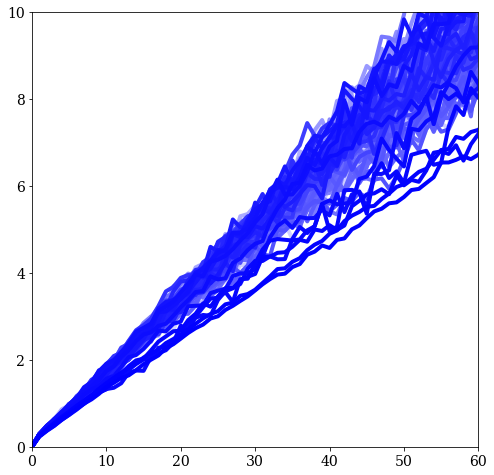

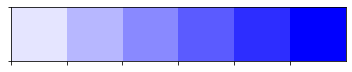

In [308]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrYZ"
#z = range()
z=[x for x in range(1,107)]
corr = corrFx(file,N=len(z),xmax= 100,z=z, ymax=100)
corr.set_ymax(10)
corr.set_xmax(60)
corr.Plot()

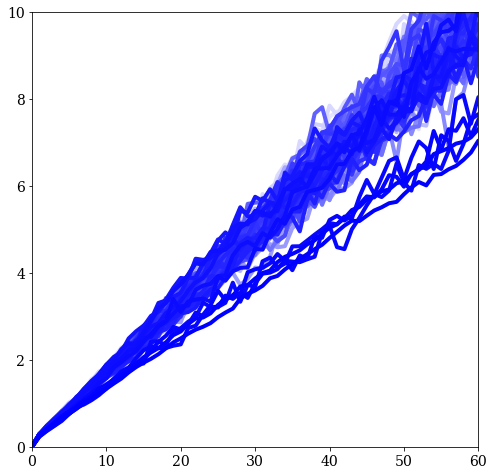

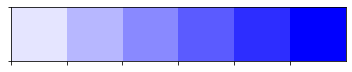

In [304]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrXZ"
#z = range()
z=[x for x in range(1,107)]
corr = corrFx(file,N=len(z),xmax= 100,z=z, ymax=100)
corr.set_ymax(10)
corr.set_xmax(60)
corr.Plot()


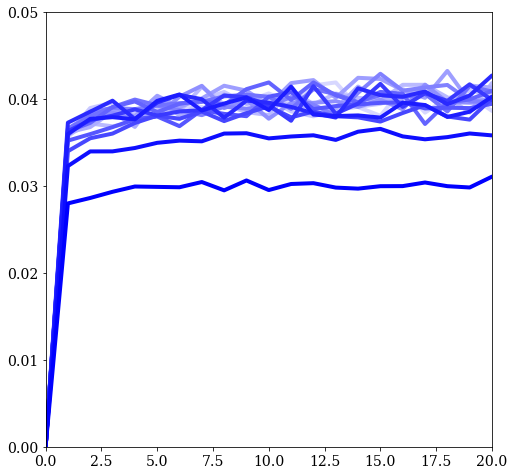

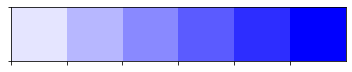

In [305]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrZZ"
#z = range()
z=[x for x in range(90,107)]
corr = corrFx(file,N=len(z),xmax= 20,z=z, ymax=0.05)
#corr.set_ymax(10)
#corr.set_xmax(60)
corr.Plot()


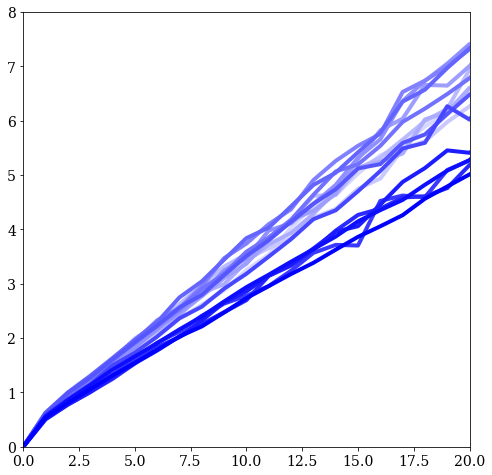

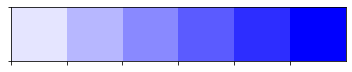

In [326]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorr"
#z = range()
z=[x for x in range(90,107)]
corr = corrFx(file,N=len(z),xmax= 20,z=z, ymax=8)
#corr.set_ymax(10)
#corr.set_xmax(60)
ff=corr.Plot()

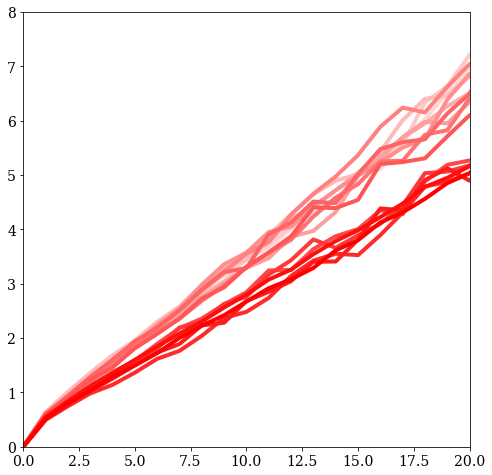

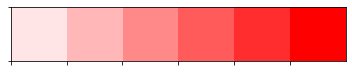

In [334]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN.rCorr"
#z = range()
z=[x for x in range(90,107)]
corr = corrFx(file,N=len(z),xmax= 20,z=z, ymax=8)
corr.set_color('red')
#corr.set_ymax(10)
#corr.set_xmax(60)
gg=corr.Plot()

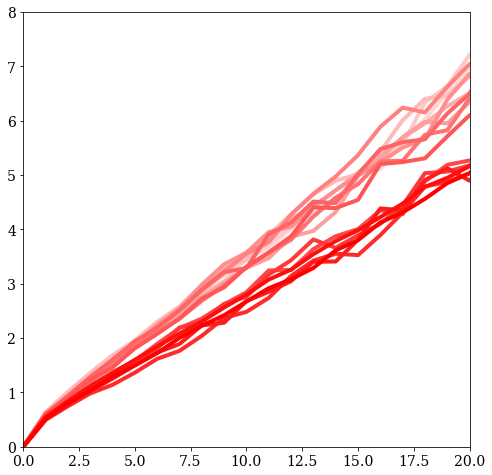

In [343]:
ff[0].get_figure()
gg[0].get_figure()


/home/hbhattar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


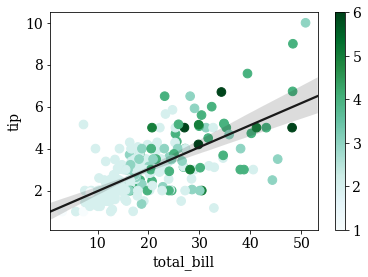

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

points = plt.scatter(tips["total_bill"], tips["tip"],
                     c=tips["size"], s=75, cmap="BuGn")
plt.colorbar(points)

sns.regplot("total_bill", "tip", data=tips, scatter=False, color=".1")

In [527]:

from matplotlib import rcParams
params = {
    'font.family':'serif',
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   }
rcParams.update(params)

class corrFxCompare(object):
    def __init__(self, fileName1, fileName2,skip=0, legend=False, N=300,xmax = 1e6, xmin = 0,ymin=0,ymax=1000,color1='blue',color2="red",z = [] ):
        self.fileName1 = fileName1
        self.fileName2 = fileName2
        self.N = N
        self.xmax = xmax
        self.xmin = xmin
        self.ymax = ymax
        self.ymin = ymin
        self.z = z
        self.color1 = color1
        self.color2 = color2
        self.skip = skip
        self.legend = legend
    def set_ymax(self, ymax):
        self.ymax = ymax
    def set_xmax(self,xmax):
        self.xmax = xmax
    def set_index(self,z):
        self.z = z
    def set_color(self, color1, color2):
        self.color1 = color1
        self.color2 = color2
    def set_legend(self,legend):
        self.legend = legend
    def Plot(self):
        import seaborn as sns
        palette1 = sns.light_palette(self.color1, self.N)
        palette2 = sns.light_palette(self.color2, self.N)
        f = pd.read_csv(self.fileName1, delimiter = "\t", header = None, skiprows=self.skip)
        g = pd.read_csv(self.fileName2, delimiter = "\t", header = None, skiprows=self.skip)
        fig1 = plt.figure(num=None, figsize=(8,8))
        ax1 =  fig1.add_subplot()
        N = self.N
        if len(self.z)==0:
            self.z = range(1,N)
        plt.xlim(self.xmin,self.xmax)
        plt.ylim(self.ymin,self.ymax)
        for columns in range(0,len(self.z)):
            plt.plot(f[self.z[columns]],color = palette1[columns],label=str(self.z[columns]),linewidth=4)
        for columns in range(0,len(self.z)):
            plt.plot(g[self.z[columns]],color = palette2[columns],label=str(self.z[columns]),linewidth=4,linestyle="dashed")
        if self.legend:
            plt.legend(loc=2,prop={'size':12}, title ="Index",ncol =5)
        sns.palplot(sns.light_palette(self.color1))
        sns.palplot(sns.light_palette(self.color2))
        
        

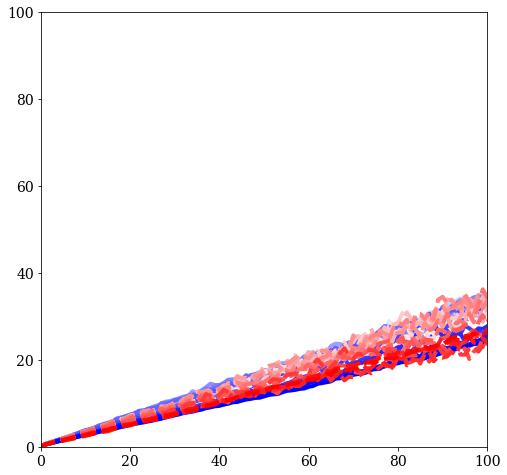

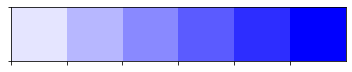

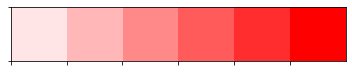

In [539]:
file1 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorr"
file2 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN.rCorr"
#z = range()
z=[x for x in range(90,107)]
#z=[107]
corr = corrFxCompare(file1,file2,N=len(z),legend=False,xmin=0,xmax= 100,z=z, ymax=100)
#corr.set_ymax(10)
#corr.set_xmax(60)
corr.Plot()

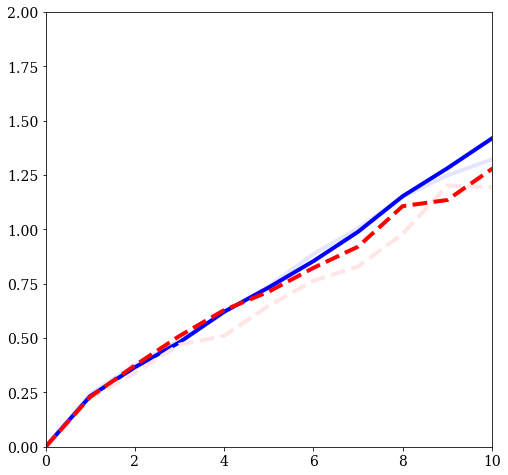

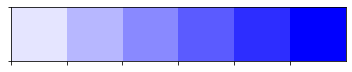

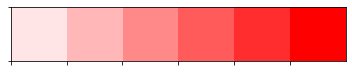

In [529]:
file1 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrYZ"
file2 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN.rCorrYZ"
#z = range()
z=[x for x in range(103,105)]
#z=[107]
corr = corrFxCompare(file1,file2,N=len(z),xmin=0,xmax= 10,z=z, ymax=2)
#corr.set_ymax(10)
#corr.set_xmax(60)
corr.Plot()

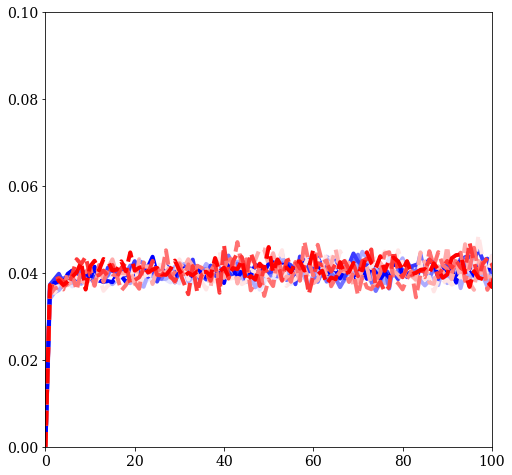

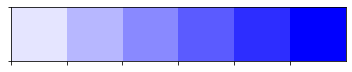

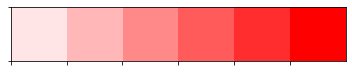

In [484]:
file1 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrZZ"
file2 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN.rCorrZZ"
#z = range()
z=[x for x in range(100,105)]
#z=[107]
corr = corrFxCompare(file1,file2,N=len(z),xmin=0,xmax= 100,z=z, ymax=0.1)
#corr.set_ymax(10)
#corr.set_xmax(60)
corr.Plot()

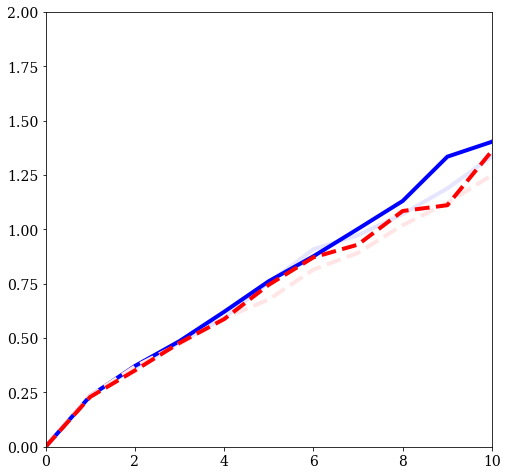

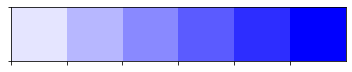

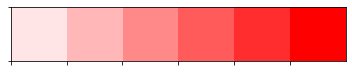

In [487]:
file1 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorrXZ"
file2 = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MFWN.rCorrXZ"
#z = range()
z=[x for x in range(103,105)]
#z=[107]
corr = corrFxCompare(file1,file2,N=len(z),xmin=0,xmax= 10,z=z, ymax=2)
#corr.set_ymax(10)
#corr.set_xmax(60)
corr.Plot()

In [515]:
a=[[1,2],[3,4]]
b=np.array(a)
m,n = b.shape
m,n

(2, 2)

In [509]:
b[:,1]

array([2, 4])

In [505]:
n=["1","2","3"]

In [508]:
list(map(float,n))

[1.0, 2.0, 3.0]

In [513]:
b[b[:,0]>1,:]

array([[3, 4]])

In [516]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [517]:
"ram".split("/")

['ram']

In [541]:
float("1e5")

100000.0

In [544]:
file = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWN.rCorr"
f = pd.read_csv(file, delimiter = "\t", header=None)

In [545]:
f.head()


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,1000,0.576874,0.595725,0.592055,0.589781,0.597285,0.588531,0.613319,0.594349,0.610229,...,0.580519,0.585579,0.597128,0.588786,0.588886,0.609573,0.588946,0.591199,0.588124,0.59546
2,2000,0.910764,0.923849,0.944512,0.896282,0.940450,0.944380,0.946707,0.910789,0.942755,...,0.947164,0.875242,0.948763,0.930795,0.927677,0.936102,0.945418,0.931002,0.919116,0.91430
3,3000,1.214630,1.267090,1.291560,1.223800,1.259160,1.260740,1.238140,1.256000,1.283710,...,1.216600,1.202420,1.272920,1.231060,1.243090,1.261980,1.239770,1.183390,1.258030,1.24287
4,4000,1.486810,1.525470,1.583990,1.494790,1.591200,1.613360,1.593730,1.591590,1.559120,...,1.509000,1.503370,1.597580,1.563670,1.580780,1.611810,1.537630,1.509000,1.549220,1.53235


In [558]:
plt.plot(f[0],f[105]/(f[0]))
plt.show()

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [557]:
f[0]+1

TypeError: must be str, not int

In [559]:
x = np.arange(10)

In [561]:
x+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])